In [1]:
#pip install --upgrade vnstock

In [82]:
import vnstock as vn
from datetime import datetime 
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import pandas_ta as ta
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")

In [3]:
df = vn.listing_companies()

In [4]:
df.head()

ticker comGroupCode                                          organName  \
0    SSI         HOSE                    Công ty Cổ phần Chứng khoán SSI   
1    BCM         HOSE  Tổng Công ty Đầu tư và Phát triển Công nghiệp ...   
2    VHM         HOSE                           Công ty Cổ phần Vinhomes   
3    VIC         HOSE                     Tập đoàn Vingroup - Công ty CP   
4    VRE         HOSE                      Công ty Cổ phần Vincom Retail   

    organShortName organTypeCode comTypeCode               icbName  \
0  Chứng khoán SSI            DN          CK  Môi giới chứng khoán   
1      Becamex IDC            DN          CT          Bất động sản   
2         Vinhomes            DN          CT          Bất động sản   
3         VinGroup            DN          CT          Bất động sản   
4    Vincom Retail            DN          CT          Bất động sản   

                                         icbNamePath     sector  \
0  Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...  Tài chính   
1   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   
2   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   
3   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   
4   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   

            industry              group              subgroup  icbCode  VN30  \
0  Dịch vụ tài chính  Dịch vụ tài chính  Môi giới chứng khoán     8777  True   
1       Bất động sản       Bất động sản          Bất động sản     8633  True   
2       Bất động sản       Bất động sản          Bất động sản     8633  True   
3       Bất động sản       Bất động sản          Bất động sản     8633  True   
4       Bất động sản       Bất động sản          Bất động sản     8633  True   

   VNMID  VN100  VNSML  VNALL  HNX30  VNX50  VNXALL  VNDIAMOND  VNFINLEAD  \
0  False   True  False   True  False   True    True      False       True   
1  False   True  False   True  False  False   False      False      False   
2  False   True  False   True  False   True    True      False      False   
3  False   True  False   True  False   True    True      False      False   
4  False   True  False   True  False   True    True      False      False   

   VNFINSELECT   VNSI  VNCOND  VNCONS  VNENE  VNFIN  VNHEAL  VNIND   VNIT  \
0         True  False   False   False  False   True   False  False  False   
1        False  False   False   False  False  False   False  False  False   
2        False  False   False   False  False  False   False  False  False   
3        False   True   False   False  False  False   False  False  False   
4        False  False   False   False  False  False   False  False  False   

   VNMAT  VNREAL  VNUTI  
0  False   False  False  
1  False    True  False  
2  False    True  False  
3  False    True  False  
4  False    True  False

In [5]:
unique_industries = df['industry'].unique()
unique_industries

array(['Dịch vụ tài chính', 'Bất động sản', 'Bảo hiểm',
       'Điện, nước & xăng dầu khí đốt', 'Ngân hàng', 'Tài nguyên Cơ bản',
       'Hóa chất', 'Thực phẩm và đồ uống', 'Du lịch và Giải trí',
       'Bán lẻ', 'Dầu khí', 'Công nghệ Thông tin', 'Viễn thông',
       'Ô tô và phụ tùng', 'Hàng cá nhân & Gia dụng', 'Truyền thông',
       'Y tế', 'Xây dựng và Vật liệu', 'Hàng & Dịch vụ Công nghiệp'],
      dtype=object)

In [6]:
financial_services_companies = df[df['industry'] == 'Dịch vụ tài chính']

unique_financial_icbNames = financial_services_companies['icbName'].unique()

unique_financial_icbNames

array(['Môi giới chứng khoán', 'Quỹ đầu tư', 'Tài chính đặc biệt',
       'Quản lý tài sản', 'Tài chính cá nhân'], dtype=object)

In [7]:
brokerage_companies = df[df['icbName'] == 'Môi giới chứng khoán']

unique_comGroupCodes = brokerage_companies['comGroupCode'].unique()

unique_comGroupCodes

array(['HOSE', 'UPCOM', 'HNX'], dtype=object)

In [8]:
#filtered_companies = df[(df['comGroupCode'].isin(['HOSE', 'HNX'])) & (df['icbName'] == 'Môi giới chứng khoán')]
filtered_companies = df[(df['icbName'] == 'Môi giới chứng khoán')]
filtered_companies

ticker comGroupCode                                          organName  \
0     SSI         HOSE                    Công ty Cổ phần Chứng khoán SSI   
55    ABW        UPCOM                Công ty Cổ phần Chứng khoán An Bình   
56    AGR         HOSE               Công ty Cổ phần Chứng khoán AGRIBANK   
57    APG         HOSE                    Công ty Cổ phần Chứng khoán APG   
58    APS          HNX  Công ty Cổ phần Chứng khoán Châu Á - Thái Bình...   
60    BMS        UPCOM               Công ty Cổ phần Chứng khoán Bảo Minh   
61    BSI         HOSE                   Công ty Cổ phần Chứng khoán BIDV   
62    BVS          HNX               Công ty Cổ phần Chứng khoán Bảo Việt   
64    CTS         HOSE  Công ty Cổ phần Chứng khoán Ngân hàng Công thư...   
65    DSC        UPCOM                    Công ty Cổ phần Chứng khoán DSC   
68    ART        UPCOM                    Công ty Cổ phần Chứng khoán BOS   
69    FTS         HOSE                    Công ty Cổ phần Chứng khoán FPT   
70    AAS        UPCOM            Công ty Cổ phần Chứng khoán SmartInvest   
71    HBS          HNX               Công ty Cổ phần Chứng khoán Hòa Bình   
72    HCM         HOSE  Công ty Cổ phần Chứng khoán Thành phố Hồ Chí Minh   
73    HAC        UPCOM              Công ty Cổ phần Chứng khoán Hải Phòng   
75    IVS          HNX  Công ty Cổ phần Chứng khoán Guotai Junan (Việt...   
76    EVS          HNX                Công ty Cổ phần Chứng khoán Everest   
78    ORS         HOSE             Công ty Cổ phần Chứng khoán Tiên Phong   
79    CSI        UPCOM    Công ty Cổ phần Chứng khoán Kiến thiết Việt Nam   
80    PHS        UPCOM               Công ty Cổ phần Chứng khoán Phú Hưng   
81    PSI          HNX                Công ty Cổ phần Chứng khoán Dầu khí   
82    SBS        UPCOM                    Công ty Cổ phần Chứng khoán SBS   
83    SHS          HNX       Công ty Cổ phần Chứng khoán Sài Gòn - Hà Nội   
84    TCI        UPCOM             Công ty Cổ phần Chứng khoán Thành Công   
85    MBS          HNX                     Công ty Cổ phần Chứng khoán MB   
86    TVB         HOSE               Công ty Cổ phần Chứng khoán Trí Việt   
88    TVS         HOSE             Công ty Cổ phần Chứng khoán Thiên Việt   
89    VCI         HOSE                Công ty Cổ phần Chứng khoán Vietcap   
90    VDS         HOSE              Công ty Cổ phần Chứng khoán Rồng Việt   
91    VFS          HNX              Công ty Cổ phần Chứng khoán Nhất Việt   
92    VUA        UPCOM       Công ty Cổ phần Chứng khoán Stanley Brothers   
93    VIG          HNX  Công ty Cổ phần Chứng khoán Đầu tư Tài chính V...   
94    VIX         HOSE                    Công ty Cổ phần Chứng khoán VIX   
95    VND         HOSE               Công ty Cổ phần Chứng khoán VNDIRECT   
96    WSS          HNX               Công ty Cổ phần Chứng khoán Phố Wall   

                           organShortName organTypeCode comTypeCode  \
0                         Chứng khoán SSI            DN          CK   
55                    Chứng khoán An Bình            DN          CK   
56                               Agriseco            DN          CK   
57                        Chứng khoán APG            DN          CK   
58                        CK Châu Á - TBD            DN          CK   
60                   Chứng khoán Bảo Minh            DN          CK   
61                       Chứng khoán BIDV            DN          CK   
62                   Chứng khoán Bảo Việt            DN          CK   
64                 Chứng khoán Vietinbank            DN          CK   
65                        Chứng khoán DSC            DN          CK   
68                        Chứng khoán BOS            DN          CK   
69                        Chứng khoán FPT            DN          CK   
70                Chứng khoán SmartInvest            DN          CK   
71                   Chứng khoán Hòa Bình            DN          CK   
72                        Chứng khoán HSC            DN          CK   
73               

In [9]:
stocklist = filtered_companies.ticker
stockname = filtered_companies.organShortName

In [10]:
stock_list = stocklist.tolist()
print(stock_list)
print(len(stock_list))
stock_string = ', '.join(stock_list)
print(stock_string)


['SSI', 'ABW', 'AGR', 'APG', 'APS', 'BMS', 'BSI', 'BVS', 'CTS', 'DSC', 'ART', 'FTS', 'AAS', 'HBS', 'HCM', 'HAC', 'IVS', 'EVS', 'ORS', 'CSI', 'PHS', 'PSI', 'SBS', 'SHS', 'TCI', 'MBS', 'TVB', 'TVS', 'VCI', 'VDS', 'VFS', 'VUA', 'VIG', 'VIX', 'VND', 'WSS']
36
SSI, ABW, AGR, APG, APS, BMS, BSI, BVS, CTS, DSC, ART, FTS, AAS, HBS, HCM, HAC, IVS, EVS, ORS, CSI, PHS, PSI, SBS, SHS, TCI, MBS, TVB, TVS, VCI, VDS, VFS, VUA, VIG, VIX, VND, WSS


In [11]:
compare_data = vn.stock_ls_analysis(stock_string).T.reset_index()
compare_data

Mã CP Vốn hóa (tỷ)    Giá Số phiên tăng/giảm liên tiếp    P/E   PEG  P/B  \
0    ABW          985  11807                           -3   28.1   0.6  0.9   
1    APS          556   6700                           -1   -1.7   0.0  0.7   
2    ART          126  16300                            0   46.6   0.0  1.4   
3    BSI         9022  44600                           -1   25.0   0.2  2.0   
4    CSI          496  29514                           -4  573.7  -7.9  2.7   
5    CTS         4030  27100                            2   26.6  -0.6  2.0   
6    DSC         4018  19613                            4   36.6   0.2  1.8   
7    EVS         1335   8100                           -1   11.8  -0.3  0.7   
8    FTS         9205  42900                            2   18.6   0.8  2.6   
9    HBS          264   8000                           -1   16.2   0.2  0.6   
10   IVS          707  10200                            0   28.2 -20.3  0.9   
11   MBS         9847  22500                           -1   20.4  -1.0  2.0   
12   ORS         3230  16150                           -1   20.7  -1.0  1.3   
13   PHS         2415  16100                            0   52.2  -1.2  1.5   
14   SHS        14881  18300                           -1   28.5  -2.5  1.5   
15   TVB          574   5120                            0   48.6  -0.5  0.6   
16   TVS         3034  20050                           -1   12.8   0.6  1.5   
17   VFS         2184  18200                            1   26.6  -1.1  1.5   
18   VIX        10979  16400                           -1   16.3   1.0  1.3   
19   VND        26245  21550                           -1   22.5  -0.5  1.7   

   EV/EBITDA Cổ tức    ROE    ROA Thanh toán hiện hành Thanh toán nhanh  \
0       17.7    0.0  0.033   0.02                  1.8              1.8   
1       -0.9    0.0 -0.336  -0.33                 56.0             56.0   
2        2.8    0.0   0.03  0.029                 81.0             81.0   
3       19.4  0.032  0.081  0.046                  2.2              2.2   
4       61.7    0.0  0.005  0.005                154.6            154.6   
5       18.6    0.0  0.078  0.022                  1.3              1.3   
6       20.6    0.0  0.067  0.037                  2.2              2.2   
7        8.6    0.0   0.06  0.047                  6.5              6.5   
8       17.9    0.0  0.144  0.073                  1.9              1.9   
9       12.3    0.0   0.04   0.04                109.1            109.1   
10      22.6    0.0  0.034  0.033                 31.7             31.7   
11      17.2    0.0  0.111   0.04                  1.5              1.5   
12       4.2    0.0  0.065  0.023                  4.4              4.4   
13      19.3  0.014  0.029  0.011                  1.6              1.6   
14      18.8    0.0  0.053  0.047                 17.0             17.0   
15      15.4    0.0  0.011   0.01                117.3            117.3   
16       6.0    0.0  0.126  0.023                  0.8              0.8   
17      18.2    0.0  0.068  0.067                 78.6             78.6   
18      10.6    0.0  0.081  0.079                 98.1             98.1   
19      14.8    0.0  0.077  0.028                  1.6              1.6   

   Nợ/Vốn CSH Nợ/EBITDA Doanh thu quý gần nhất   RSI    RS  
0         0.6       6.9                  0.459  43.6  19.0  
1         0.0       0.0                 -0.801  43.2   3.0  
2         0.0       0.0                  0.038   0.0  34.0  
3         0.7       4.9                   0.22  50.7  86.0  
4         0.0       0.0                 -0.016  30.8   8.0  
5         2.8       9.0                 -0.325  52.2  72.0  
6         0.8       5.4                 -0.029  68.4  68.0  
7         0.1       1.5                  1.147  38.2  16.0  
8         0.7       2.9                  0.251  54.4  82.0  
9         0.0       0.0                 -0.304  46.9  11.0  
10        0.0       0.4                 -0.139  54.1  66.0  
11        1.5       7.1            

We can see that in the list of securities companies, there are a total of 36 companies, but in the 'compare_data' list, there are only 19 companies.

The reason is that, according to the 'vnstock' package, missing data will be omitted.

In [12]:
vn.industry_analysis("VCI").T.reset_index()

Mã CP Vốn hóa (tỷ)    Giá Số phiên tăng/giảm liên tiếp   P/E  PEG  P/B  \
0    VCI        17916  40950                            1  45.1 -0.6  2.5   
1    SSI        47523  31700                           -2  23.6 -1.5  2.1   
2    VND        26245  21550                           -1  22.5 -0.5  1.7   
3    SHS        14881  18300                           -1  28.5 -2.5  1.5   
4    HCM        14174  31000                           -1  22.8 -0.7  1.7   
5    VIX        10979  16400                           -1  16.3  1.0  1.3   
6    MBS         9847  22500                           -1  20.4 -1.0  2.0   
7    FTS         9205  42900                            2  18.6  0.8  2.6   
8    BSI         9022  44600                           -1  25.0  0.2  2.0   
9    CTS         4030  27100                            2  26.6 -0.6  2.0   
10   DSC         4018  19613                            4  36.6  0.2  1.8   
11   AGR         3382  15700                           -1  21.6 -1.6  1.4   
12   VDS         3371  16050                           -1  12.6  0.0  1.5   
13   ORS         3230  16150                           -1  20.7 -1.0  1.3   
14   TVS         3034  20050                           -1  12.8  0.6  1.5   
15   PHS         2415  16100                            0  52.2 -1.2  1.5   
16   AAS         1910   8305                           -2  17.0 -0.2  0.8   
17   APG         1644  10700                            1 -28.5  0.2  1.0   
18   EVS         1335   8100                           -1  11.8 -0.3  0.7   
19   SBS         1043   7113                           -1 -14.8  0.0  3.0   

   EV/EBITDA Cổ tức    ROE    ROA Thanh toán hiện hành Thanh toán nhanh  \
0       20.4    0.0  0.057  0.024                  1.8              1.8   
1       19.0  0.059   0.09   0.04                  1.6              1.6   
2       14.8    0.0  0.077  0.028                  1.6              1.6   
3       18.8    0.0  0.053  0.047                 17.0             17.0   
4       24.4  0.039  0.077  0.033                  1.9              1.9   
5       10.6    0.0  0.081  0.079                 98.1             98.1   
6       17.2    0.0  0.111   0.04                  1.5              1.5   
7       17.9    0.0  0.144  0.073                  1.9              1.9   
8       19.4  0.032  0.081  0.046                  2.2              2.2   
9       18.6    0.0  0.078  0.022                  1.3              1.3   
10      20.6    0.0  0.067  0.037                  2.2              2.2   
11      17.4  0.083  0.063  0.053                  4.1              4.1   
12      13.5    0.0  0.142  0.053                  1.8              1.8   
13       4.2    0.0  0.065  0.023                  4.4              4.4   
14       6.0    0.0  0.126  0.023                  0.8              0.8   
15      19.3  0.014  0.029  0.011                  1.6              1.6   
16      23.4    0.0  0.057  0.043                  4.3              4.3   
17     -40.6    0.0 -0.034 -0.032                 35.6             35.6   
18       8.6    0.0   0.06  0.047                  6.5              6.5   
19     -20.8    0.0 -0.184 -0.135                  2.3              2.3   

   Biên LNG Biên LNST Nợ/Vốn CSH Nợ/EBITDA LNST 5 năm Doanh thu 5 năm  \
0     0.597     0.268        1.2       6.2      0.058           0.155   
1     0.664     0.366        1.3       6.4      0.079           0.169   
2     0.704     0.363        1.4       6.4      0.205           0.411   
3     0.572     0.411        0.0       0.7     -0.152           0.072   
4      0.43      0.26        1.0      11.8       0.09           0.205   
5      0.79     0.617        0.0       0.0      0.318           0.251   
6     0.679     0.308        1.5       7.1      0.846           0.185   
7      0.71     0.565        0.7       2.9      0.122           0.219   
8     0.616     0.318        0.7       4.9     -0.085           0.139   
9     0.731     0.265        2.8       9.0     -0.083           0.249   
10    

In [13]:
vonnhoa_list = []
p_b_list = []
roe_list = []
for stock_code in stock_list:
   
    d = vn.industry_analysis(stock_code).T.reset_index()
    vonnhoa = d[(d["Mã CP"] == stock_code)]["Vốn hóa (tỷ)"].values[0]
    p_b = d[(d["Mã CP"] == stock_code)]["P/B"].values[0]
    roe = d[(d["Mã CP"] == stock_code)]["ROE"].values[0]
  
    vonnhoa_list.append(vonnhoa) 
    p_b_list.append(p_b)
    roe_list.append(roe)

In [14]:
dfr = pd.DataFrame({'Mã CP': stock_list, 
                    'Vốn hóa (tỷ)': vonnhoa_list, 
                    'P/B': p_b_list,
                    'ROE': roe_list
                   })
dfr

Mã CP  Vốn hóa (tỷ)  P/B    ROE
0    SSI       47523.0  2.1  0.090
1    ABW         985.0  0.9  0.033
2    AGR        3382.0  1.4  0.063
3    APG        1644.0  1.0 -0.034
4    APS         556.0  0.7 -0.336
5    BMS         726.0  0.9  0.058
6    BSI        9022.0  2.0  0.081
7    BVS        1819.0  0.8  0.081
8    CTS        4030.0  2.0  0.078
9    DSC        4018.0  1.8  0.067
10   ART         126.0  1.4  0.030
11   FTS        9205.0  2.6  0.144
12   AAS        1910.0  0.8  0.057
13   HBS         264.0  0.6  0.040
14   HCM       14174.0  1.7  0.077
15   HAC           NaN  NaN    NaN
16   IVS         707.0  0.9  0.034
17   EVS        1335.0  0.7  0.060
18   ORS        3230.0  1.3  0.065
19   CSI         496.0  2.7  0.005
20   PHS        2415.0  1.5  0.029
21   PSI         521.0  0.8  0.051
22   SBS        1043.0  3.0 -0.184
23   SHS       14881.0  1.5  0.053
24   TCI        1229.0  0.9  0.045
25   MBS        9847.0  2.0  0.111
26   TVB         574.0  0.6  0.011
27   TVS        3034.0  1.5  0.126
28   VCI       17916.0  2.5  0.057
29   VDS        3371.0  1.5  0.142
30   VFS        2184.0  1.5  0.068
31   VUA         791.0  2.6 -0.188
32   VIG         348.0  1.1  0.083
33   VIX       10979.0  1.3  0.081
34   VND       26245.0  1.7  0.077
35   WSS         317.0  0.6  0.052

In [15]:
dfr = dfr.dropna()
print(len(dfr))

35


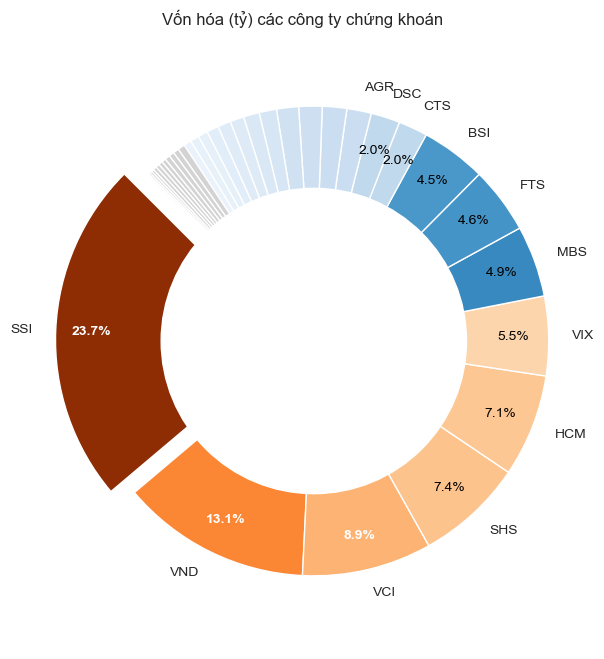

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return plt.cm.Oranges(value / 50000)  # Sử dụng colormap 'Oranges'
    elif 1000 < value <= 10000:
        return plt.cm.Blues(value / 15000)  # Sử dụng colormap 'Greens'
    elif value <= 1000:
        return 'lightgray'

# Hàm tùy chỉnh để hiển thị phần trăm
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 1.8 else ''

# Sắp xếp dữ liệu từ lớn đến bé
dfr_sorted = dfr.sort_values(by='Vốn hóa (tỷ)', ascending=False)

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_sorted['color'] = dfr_sorted['Vốn hóa (tỷ)'].apply(assign_color)

labels = ['' if i >= 12 else v for i, v in enumerate(dfr_sorted["Mã CP"])]

# Tạo danh sách explode
explode = [0.1 if i == 0 else 0 for i in range(len(dfr_sorted))]

# Vẽ biểu đồ pie chart
plt.figure(figsize=(7, 8))  # Đặt kích thước hình vẽ thành 10x10
patches, texts, autotexts = plt.pie(dfr_sorted["Vốn hóa (tỷ)"], 
                                    labels=labels, 
                                    autopct=custom_autopct, startangle=135, 
                                    colors=dfr_sorted['color'], explode=explode, pctdistance=0.85)

# Vẽ một vòng tròn trắng ở giữa
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Vốn hóa (tỷ) các công ty chứng khoán')

# Đặt màu cho phần trăm
for i, autotext in enumerate(autotexts):
    if i < 3:
        autotext.set_color('white')
        autotext.set_weight('bold')
    else:
        autotext.set_color('black')

output_file_path = '%Vốn_hoá.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


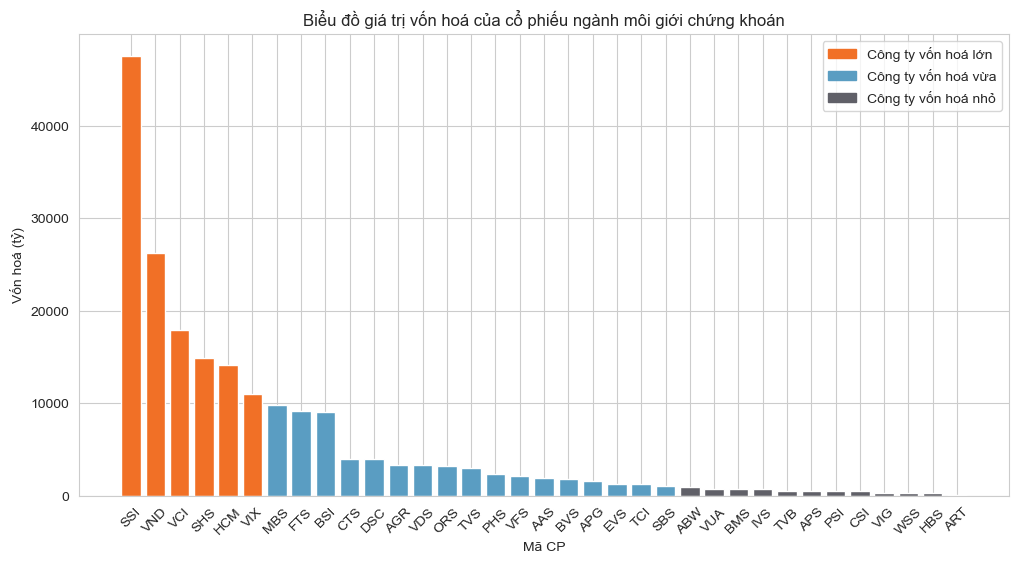

In [17]:
# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return '#F17026'  # Màu cam nếu vốn hoá > 10000
    elif 1000 < value <= 10000:
        return '#5A9DC2'  # Màu xanh nếu vốn hoá lớn hơn 1000 nhỏ hơn 10000
    else:
        return '#606068'  # Màu xám cho các giá trị còn lại

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_sorted['color'] = dfr_sorted['Vốn hóa (tỷ)'].apply(assign_color)

fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ bar với màu sắc tương ứng
bar1 = ax.bar(dfr_sorted['Mã CP'], dfr_sorted['Vốn hóa (tỷ)'], label='Vốn hoá (tỷ)', color=dfr_sorted['color'])

ax.set_ylabel('Vốn hoá (tỷ)')
ax.set_xlabel('Mã CP')
ax.set_title('Biểu đồ giá trị vốn hoá của cổ phiếu ngành môi giới chứng khoán')
ax.set_xticks(dfr_sorted['Mã CP'])
ax.set_xticklabels(dfr_sorted['Mã CP'], rotation=45)
ax.tick_params(axis='x', labelsize=10)

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở dưới bên phải
plt.legend(handles=[orange_patch, green_patch, gray_patch], loc='upper right')

output_file_path = 'Bar_chart_Vốn_hoá.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()

In [18]:
mean_p_b = dfr["P/B"].mean()
print(mean_p_b)


1.4542857142857142


C:\Users\Admin\AppData\Local\Temp\ipykernel_10996\1409358013.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr_positive_roe['color'] = dfr_positive_roe['Vốn hóa (tỷ)'].apply(assign_color)


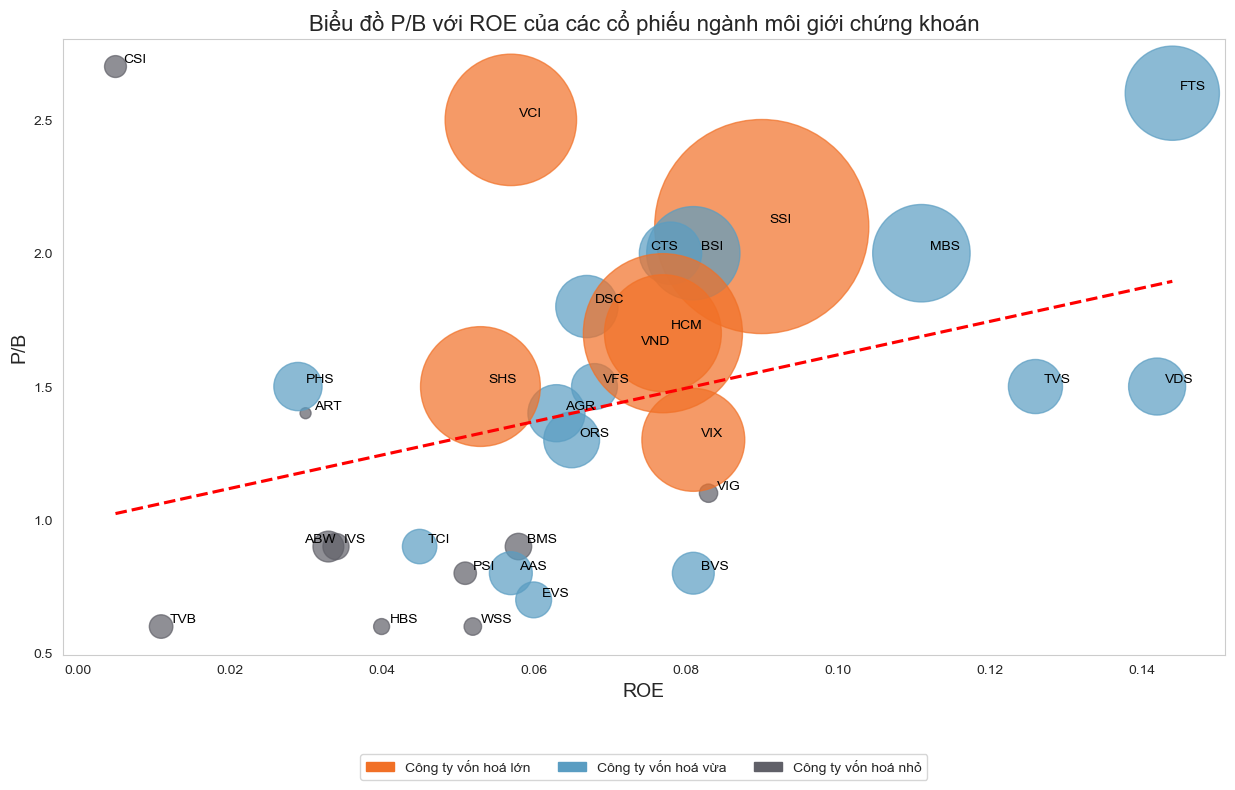

In [19]:
# Lọc DataFrame để chỉ giữ lại các hàng có ROE dương
dfr_positive_roe = dfr.loc[dfr['ROE'] > 0]

# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return '#F17026'  # Màu cam nếu vốn hoá > 10000
    elif 1000 < value <= 10000:
        return '#5A9DC2'  # Màu xanh nếu vốn hoá lớn hơn 1000 nhỏ hơn 10000
    else:
        return '#606068'  # Màu xám cho các giá trị còn lại

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_positive_roe['color'] = dfr_positive_roe['Vốn hóa (tỷ)'].apply(assign_color)

from adjustText import adjust_text

# Scatter plot with regression line (without confidence interval), size by log(Market Cap)
plt.figure(figsize=(15, 8))

# Use plt.scatter to create the scatter plot with custom colors
plt.scatter(x=dfr_positive_roe['ROE'], y=dfr_positive_roe['P/B'], 
            s=dfr_positive_roe['Vốn hóa (tỷ)']/2, alpha=0.7, 
            c=dfr_positive_roe['color'])

# Use sns.regplot to add the regression line
sns.regplot(x='ROE', y='P/B', data=dfr_positive_roe, 
            scatter=False, 
            line_kws={'color': 'red', 'linestyle': '--'}, ci=None)

texts = []
for index, row in dfr_positive_roe.iterrows():
    texts.append(plt.text(row['ROE'] + 0.001, row['P/B'], row['Mã CP'],
                      horizontalalignment='left', size='medium', color='black'))

adjust_text(texts)

plt.xlabel('ROE', fontsize=14)
plt.ylabel('P/B', fontsize=14)
plt.title('Biểu đồ P/B với ROE của các cổ phiếu ngành môi giới chứng khoán', fontsize=16)
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch, gray_patch], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

output_file_path = 'scatter_reg_line_pb_roe.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_10996\2430982894.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr_sorted_positive_roe['color'] = dfr_sorted_positive_roe['Vốn hóa (tỷ)'].apply(assign_color)


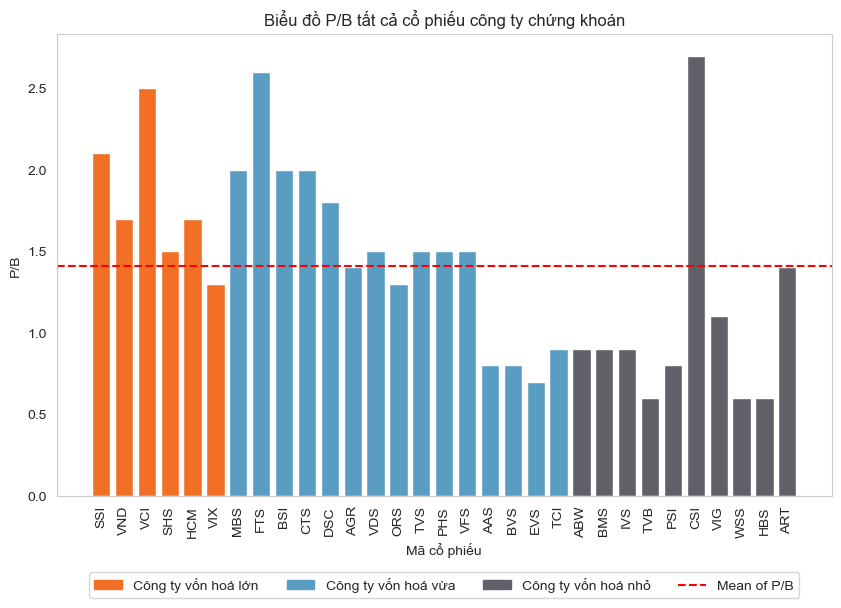

In [20]:
# Lọc DataFrame để chỉ giữ lại các hàng có ROE dương
dfr_sorted_positive_roe = dfr_sorted.loc[dfr_sorted['ROE'] > 0]

# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return '#F17026'  # Màu cam nếu vốn hoá > 10000
    elif 1000 < value <= 10000:
        return '#5A9DC2'  # Màu xanh nếu vốn hoá lớn hơn 1000 nhỏ hơn 10000
    else:
        return '#606068'  # Màu xám cho các giá trị còn lại

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_sorted_positive_roe['color'] = dfr_sorted_positive_roe['Vốn hóa (tỷ)'].apply(assign_color)

plt.figure(figsize=(10, 6))
plt.bar(dfr_sorted_positive_roe["Mã CP"], dfr_sorted_positive_roe["P/B"], 
        label="P/B", color=dfr_sorted_positive_roe['color'])
mean_pb_line = plt.axhline(y=dfr_sorted_positive_roe["P/B"].mean(), color='r', linestyle='--', label="Mean of P/B")

plt.xlabel("Mã cổ phiếu")
plt.ylabel("P/B")
plt.title("Biểu đồ P/B tất cả cổ phiếu công ty chứng khoán")
plt.xticks(rotation=90)
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch, gray_patch, mean_pb_line], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

output_file_path = 'bar_pb_all.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


According to my observation, companies with small market capitalization often have p/b values that are too low or too high, affecting the average value of the whole industry. Therefore, I only take the 10 companies with the largest market capitalization to compare with each other.

In [21]:
dfr_top9 = dfr_sorted_positive_roe.head(9).reset_index()
dfr_top9

index Mã CP  Vốn hóa (tỷ)  P/B    ROE    color
0      0   SSI       47523.0  2.1  0.090  #F17026
1     34   VND       26245.0  1.7  0.077  #F17026
2     28   VCI       17916.0  2.5  0.057  #F17026
3     23   SHS       14881.0  1.5  0.053  #F17026
4     14   HCM       14174.0  1.7  0.077  #F17026
5     33   VIX       10979.0  1.3  0.081  #F17026
6     25   MBS        9847.0  2.0  0.111  #5A9DC2
7     11   FTS        9205.0  2.6  0.144  #5A9DC2
8      6   BSI        9022.0  2.0  0.081  #5A9DC2

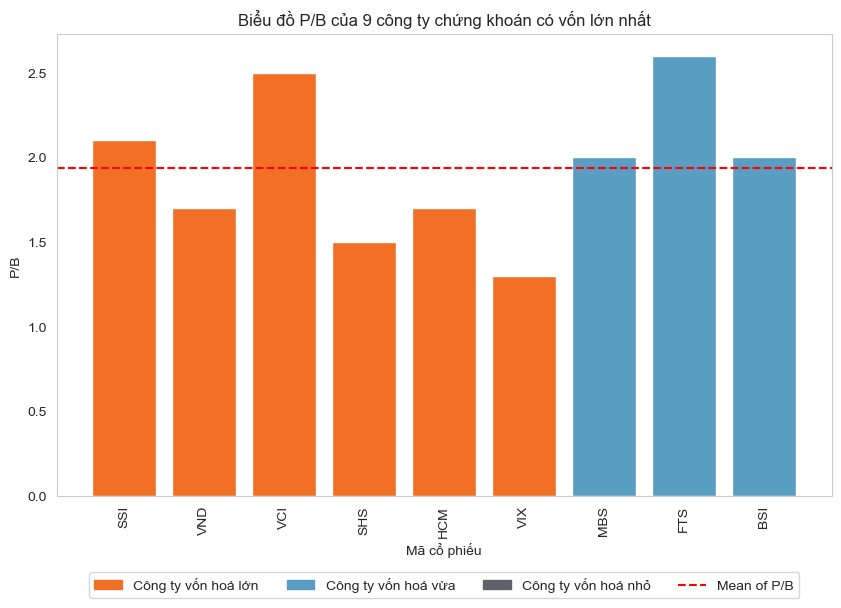

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(dfr_top9["Mã CP"], dfr_top9["P/B"], 
        label="P/B", color= dfr_top9['color'])
mean_pb_line = plt.axhline(y=dfr_top9["P/B"].mean(), color='r', linestyle='--', label="Mean of P/B")

plt.xlabel("Mã cổ phiếu", fontsize = 10)
plt.ylabel("P/B")
plt.title("Biểu đồ P/B của 9 công ty chứng khoán có vốn lớn nhất")
plt.xticks(rotation=90)
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch, gray_patch, mean_pb_line], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

output_file_path = 'bar_pb_top_9.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


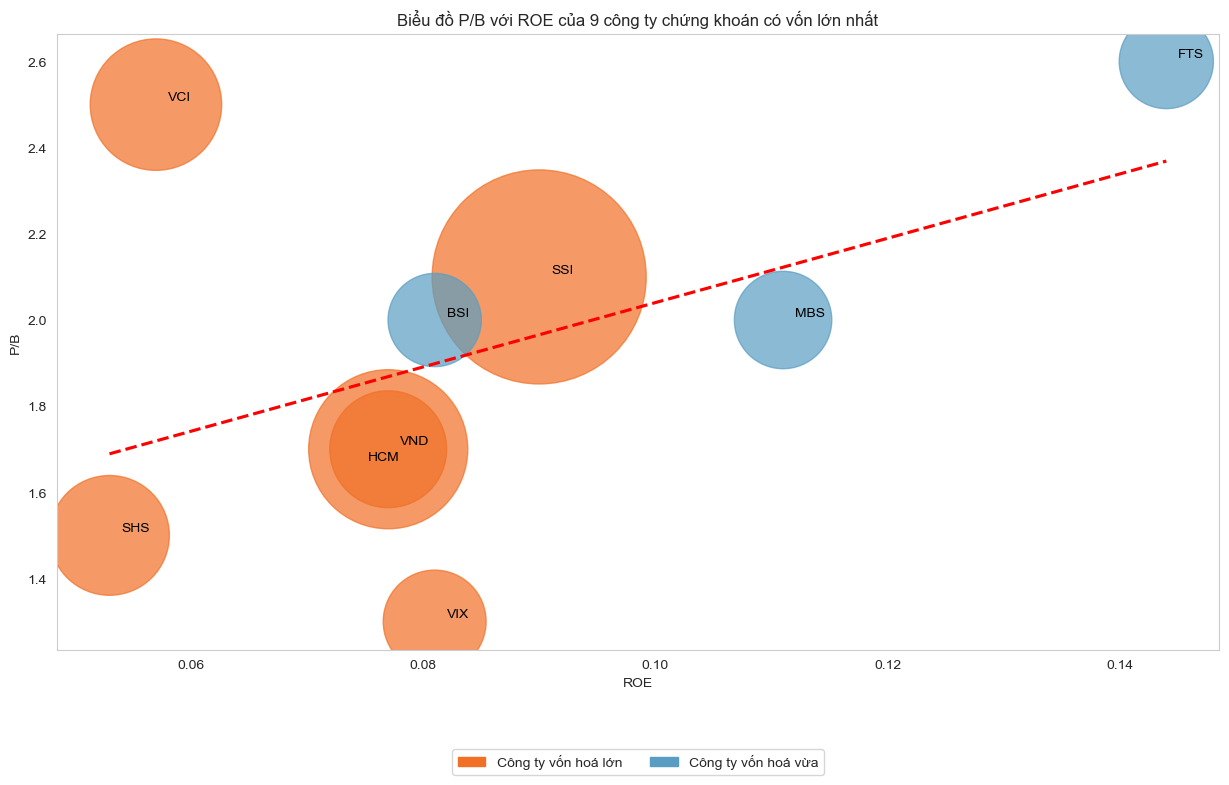

In [23]:
from adjustText import adjust_text

# Scatter plot with regression line (without confidence interval), size by log(Market Cap)
plt.figure(figsize=(15, 8))

# Use plt.scatter to create the scatter plot with custom colors
plt.scatter(x=dfr_top9['ROE'], y=dfr_top9['P/B'], 
            s=dfr_top9['Vốn hóa (tỷ)']/2, alpha=0.7, 
            c=dfr_top9['color'])

# Use sns.regplot to add the regression line
sns.regplot(x='ROE', y='P/B', data=dfr_top9, 
            scatter=False, 
            line_kws={'color': 'red', 'linestyle': '--'}, ci=None)

texts = []
for index, row in dfr_top9.iterrows():
    texts.append(plt.text(row['ROE'] + 0.001, row['P/B'], row['Mã CP'],
                      horizontalalignment='left', size='medium', color='black'))

adjust_text(texts)

plt.xlabel('ROE')
plt.ylabel('P/B')
plt.title('Biểu đồ P/B với ROE của 9 công ty chứng khoán có vốn lớn nhất')
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

output_file_path = 'scatter_reg_pb_top_9.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()



Based on the chart above, we see that the codes “VND”, “SHS”, “HCM”, “VIX”, "MBS" have P/B values lower than the average P/B value of the 10 companies.

Therefore, we will concentrate on a more in-depth analysis of these four stocks.

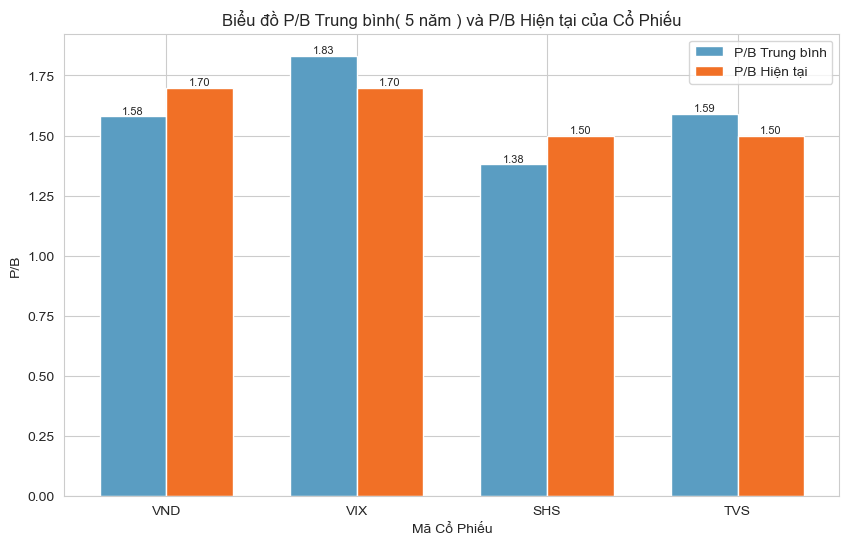

In [25]:
last_stock_list = ["VND", "VIX", "SHS", "TVS"]

data_vnd = vn.stock_evaluation (symbol='VND', period=5, time_window='Y')
data_vix = vn.stock_evaluation (symbol='HCM', period=5, time_window='Y')
data_shs = vn.stock_evaluation (symbol='SHS', period=5, time_window='Y')
data_tvs = vn.stock_evaluation (symbol='TVS', period=5, time_window='Y')

avg_pb_vnd = data_vnd['PB'].mean()
avg_pb_vix = data_vix['PB'].mean()
avg_pb_shs = data_shs['PB'].mean()
avg_pb_tvs = data_tvs['PB'].mean()


# Mã cổ phiếu và giá trị P/B tương ứng
avg_pbs = [avg_pb_vnd, avg_pb_vix, avg_pb_shs , avg_pb_tvs]
current_pbs = [data_vnd['PB'].iloc[-1], 
               data_vix['PB'].iloc[-1], 
               data_shs['PB'].iloc[-1], 
               data_tvs['PB'].iloc[-1]]

# Số lượng mã cổ phiếu
num_stocks = len(last_stock_list)

# Vị trí của mỗi mã cổ phiếu trên biểu đồ
x = range(num_stocks)

# Độ rộng của các cột
width = 0.35

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ cột cho P/B trung bình
avg_bar = ax.bar(x, avg_pbs, width, label='P/B Trung bình', color='#5A9DC2')

# Vị trí cho cột P/B hiện tại
current_x = [i + width for i in x]

# Vẽ cột cho P/B hiện tại
current_bar = ax.bar(current_x, current_pbs, 
                     width, label='P/B Hiện tại', 
                     color='#F17026')

# Đặt tên cho các cột
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(last_stock_list)
ax.set_xlabel('Mã Cổ Phiếu')
ax.set_ylabel('P/B')
ax.set_title('Biểu đồ P/B Trung bình( 5 năm ) và P/B Hiện tại của Cổ Phiếu')
ax.legend()

# Hiển thị giá trị trên các cột
for bar in avg_bar + current_bar:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

output_file_path = 'pb_mean_pb_5_year.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


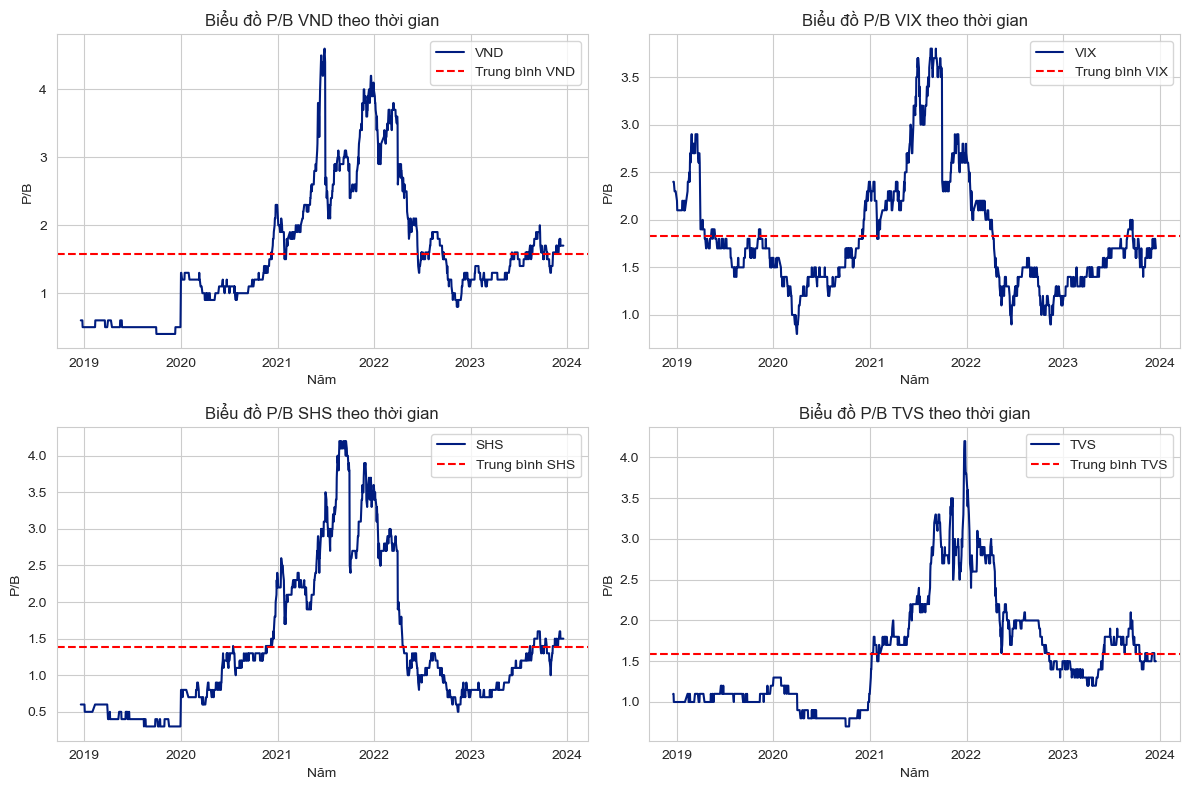

In [26]:
import matplotlib.pyplot as plt

# Tạo một lưới 2x2 cho biểu đồ
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Mã cổ phiếu và dữ liệu P/B tương ứng
pb_data = [data_vnd, data_vix, data_shs, data_tvs]
avg_pbs = [avg_pb_vnd, avg_pb_vix, avg_pb_shs, avg_pb_tvs]

# Vẽ biểu đồ cho từng mã cổ phiếu
for i in range(4):
    row, col = divmod(i, 2)  # Xác định vị trí hàng và cột trong lưới
    ax = axs[row, col]  # Lấy ô tại vị trí đó
    stock = last_stock_list[i]
    data = pb_data[i]
    avg_pb = avg_pbs[i]
    
    ax.plot(data['fromDate'], data['PB'], label=stock)  # Biểu đồ line P/B
    ax.axhline(y=avg_pb, color='r', linestyle='--', label=f"Trung bình {stock}")  # Đường trung bình
    ax.set_xlabel("Năm")
    ax.set_ylabel("P/B")
    ax.set_title(f"Biểu đồ P/B {stock} theo thời gian")
    ax.legend()

# Tạo khoảng trống cho tiêu đề chung của lưới
plt.tight_layout()

output_file_path = 'pb_mean_pb_5_year_lineplot.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


In [92]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

for stock in last_stock_list:
    # Tạo DataFrame cho cổ phiếu và đặt cột "time" làm index
    stock_data = vn.stock_historical_data(stock, start, end, resolution='1D', type='stock')
    stock_data = stock_data.set_index("time")
    
    # Lưu DataFrame vào biến globals()
    globals()[stock] = stock_data


company_list = [VND, VIX, SHS, TVS]
company_name = ["Chứng khoán VnDirect", "Chứng khoán Vietstock", 
                "Chứng khoán SG - HN", "Chứng khoán Thiên Việt" ]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    





In [93]:
df = pd.concat(company_list, axis=0)
#df.time = pd.to_datetime(df.time)
#df = df.set_index("time")
df.tail(10)


open   high    low  close  volume ticker            company_name
time                                                                         
2023-12-06  20900  21250  20900  20950   71500    TVS  Chứng khoán Thiên Việt
2023-12-07  21000  21200  20300  21000   81100    TVS  Chứng khoán Thiên Việt
2023-12-08  21000  21000  20450  21000   35500    TVS  Chứng khoán Thiên Việt
2023-12-11  20950  20950  20500  20900   18200    TVS  Chứng khoán Thiên Việt
2023-12-12  20900  21000  20600  21000   21200    TVS  Chứng khoán Thiên Việt
2023-12-13  20950  20950  20650  20650   18300    TVS  Chứng khoán Thiên Việt
2023-12-14  20550  20650  20350  20350   19700    TVS  Chứng khoán Thiên Việt
2023-12-15  20400  20650  20150  20600   38900    TVS  Chứng khoán Thiên Việt
2023-12-18  20500  20500  19950  20050   98300    TVS  Chứng khoán Thiên Việt
2023-12-19  20150  20150  19800  20050   25600    TVS  Chứng khoán Thiên Việt

In [94]:
VND.describe()

open          high           low         close        volume
count    252.000000    252.000000    252.000000    252.000000  2.520000e+02
mean   18121.031746  18467.059524  17748.408730  18079.559524  2.641151e+07
std     3102.253731   3159.130360   3038.660301   3104.556549  1.290977e+07
min    13000.000000  13300.000000  13000.000000  13050.000000  6.799000e+06
25%    15150.000000  15387.500000  14837.500000  15100.000000  1.780602e+07
50%    18325.000000  18675.000000  18050.000000  18300.000000  2.466180e+07
75%    20700.000000  21087.500000  20012.500000  20562.500000  3.147728e+07
max    25200.000000  25600.000000  24700.000000  25250.000000  1.058780e+08

In [95]:
VIX.describe()

open          high           low         close        volume
count    252.000000    252.000000    252.000000    252.000000  2.520000e+02
mean   11485.587302  11732.452381  11200.630952  11477.694444  2.234677e+07
std     4700.911396   4793.197964   4545.611693   4694.580295  1.402364e+07
min     5560.000000   5700.000000   5490.000000   5580.000000  2.264300e+06
25%     6687.500000   6777.500000   6497.500000   6635.000000  1.237142e+07
50%    11025.000000  11350.000000  10850.000000  11075.000000  1.971065e+07
75%    16062.500000  16450.000000  15562.500000  16050.000000  3.080658e+07
max    20600.000000  20750.000000  19750.000000  20600.000000  7.388510e+07

In [96]:
SHS.describe()

open          high           low         close        volume
count    252.000000    252.000000    252.000000    252.000000  2.520000e+02
mean   13200.793651  13592.460317  12924.206349  13273.015873  2.130908e+07
std     3796.024258   3883.151713   3697.324510   3799.484400  1.039975e+07
min     7500.000000   8200.000000   7500.000000   8000.000000  3.768100e+06
25%     9400.000000   9700.000000   9175.000000   9475.000000  1.460988e+07
50%    13550.000000  13800.000000  13200.000000  13500.000000  1.930415e+07
75%    16625.000000  17325.000000  16200.000000  16725.000000  2.564238e+07
max    20600.000000  20700.000000  19800.000000  20500.000000  6.971370e+07

In [97]:
TVS.describe()

open          high           low         close         volume
count    252.000000    252.000000    252.000000    252.000000     252.000000
mean   20122.750000  20416.126984  19686.075397  20026.230159   68062.698413
std     3269.735726   3305.954718   3209.905540   3233.837537   81095.067161
min    15300.000000  15580.000000  15080.000000  15080.000000     200.000000
25%    16630.000000  16880.000000  16299.250000  16590.000000   10825.000000
50%    20400.000000  20650.000000  20000.000000  20300.000000   39200.000000
75%    23112.500000  23500.000000  22762.500000  23050.000000   91650.000000
max    28000.000000  28400.000000  27000.000000  27600.000000  488900.000000

In [98]:
VIX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2022-12-19 to 2023-12-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   open          252 non-null    int32 
 1   high          252 non-null    int32 
 2   low           252 non-null    int32 
 3   close         252 non-null    int32 
 4   volume        252 non-null    int64 
 5   ticker        252 non-null    object
 6   company_name  252 non-null    object
dtypes: int32(4), int64(1), object(2)
memory usage: 11.8+ KB


## Closing Price

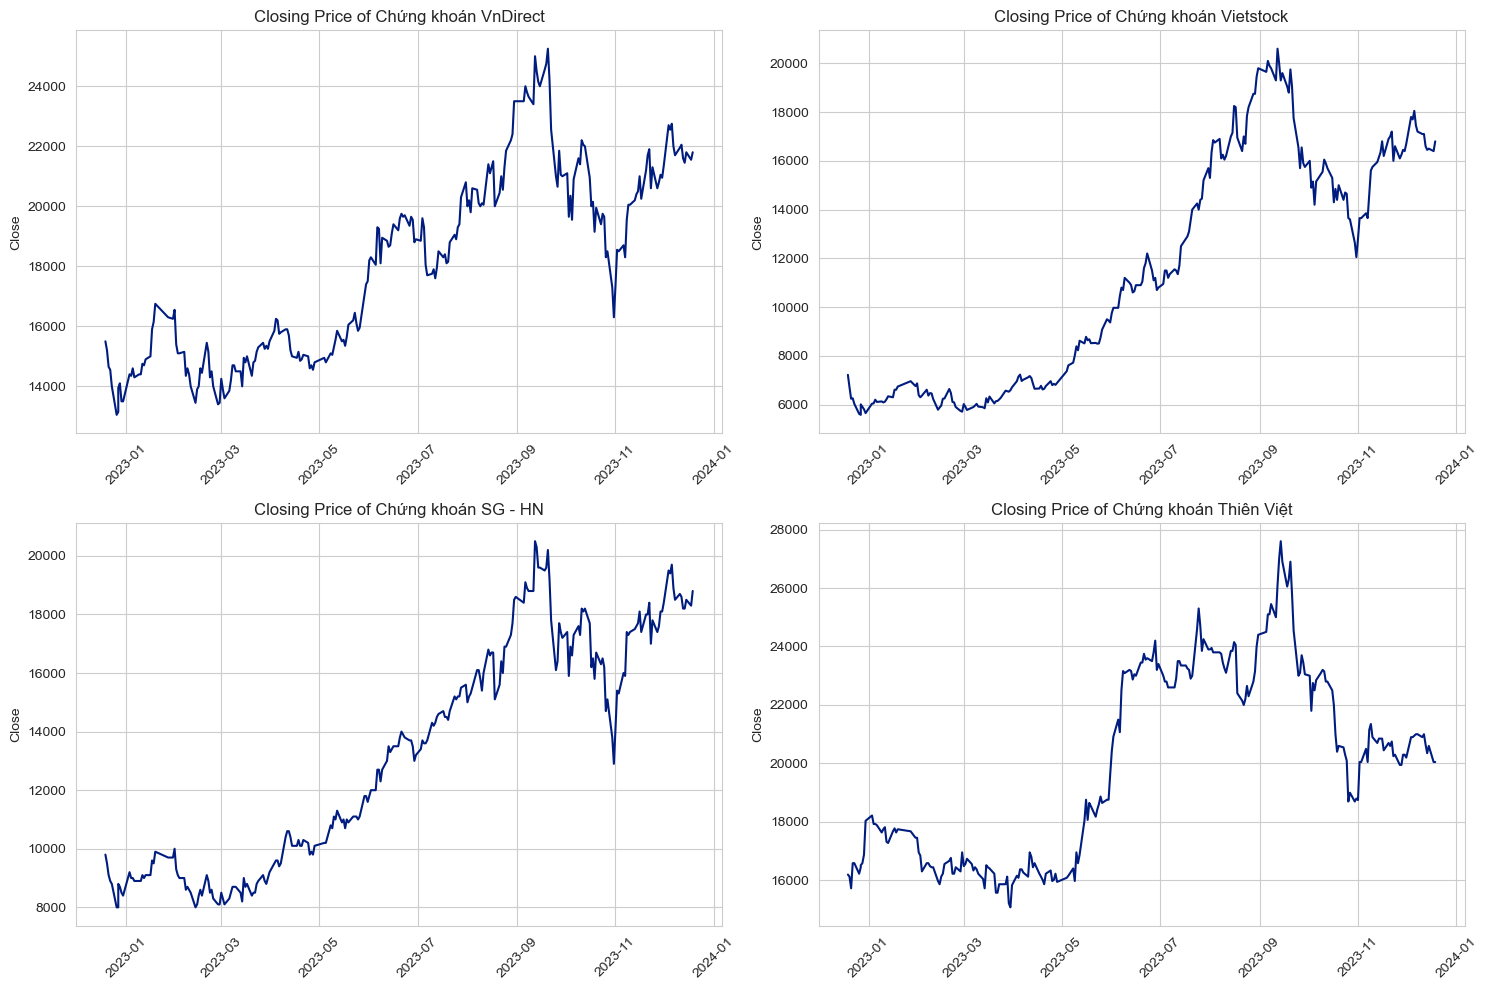

In [99]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['close'] )
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.xticks(rotation = 45)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

## Volume of Sales

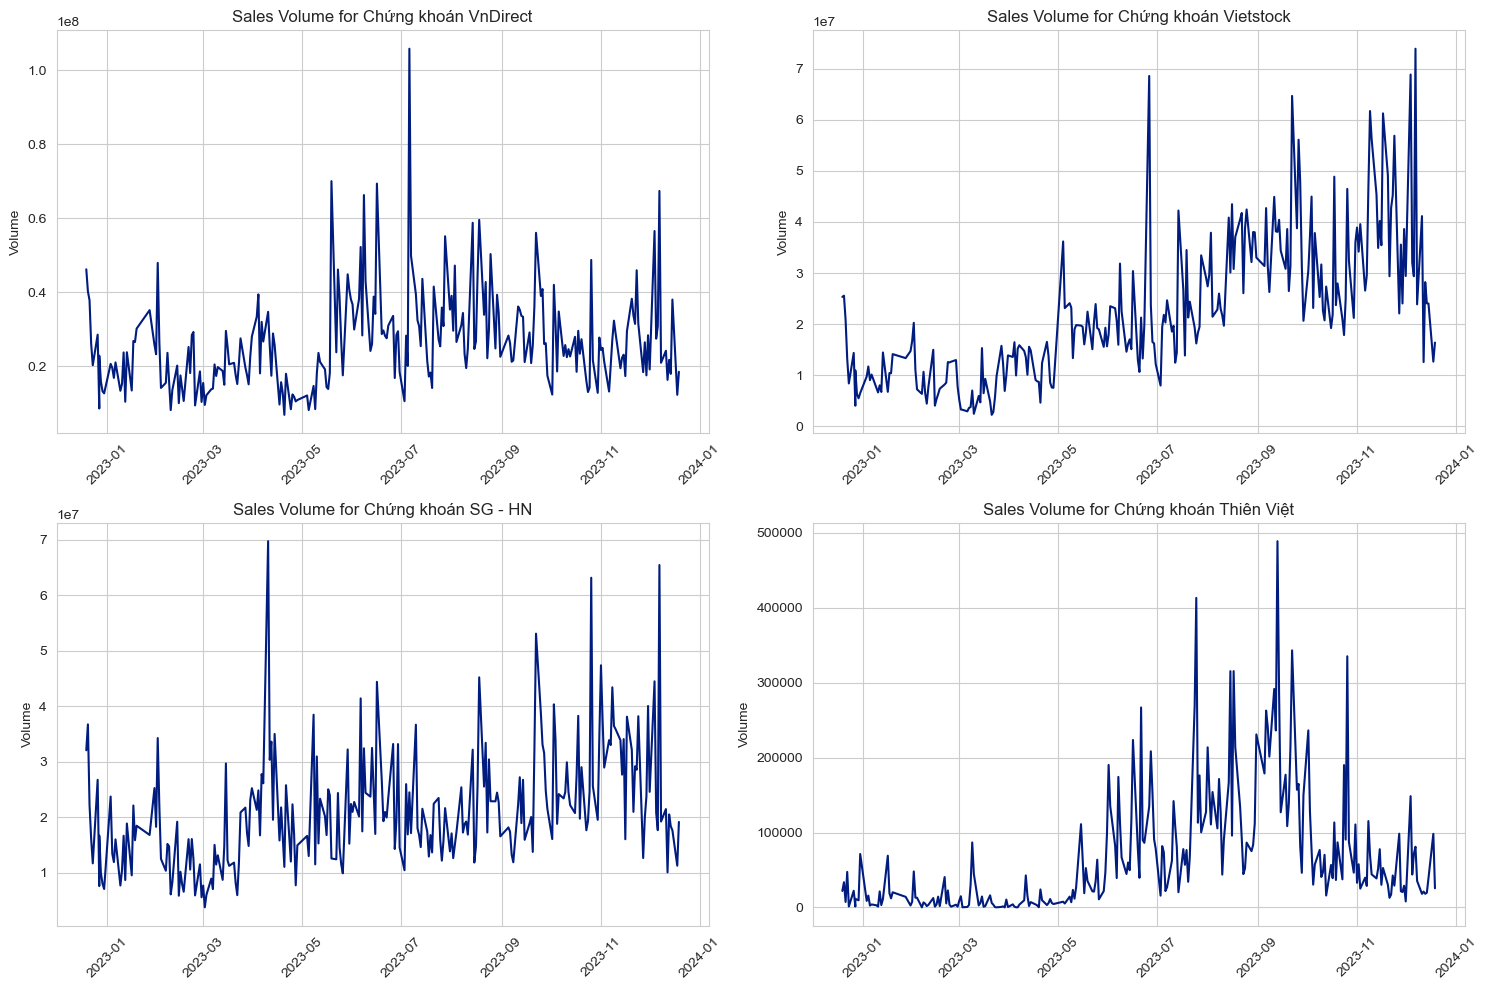

In [100]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['volume'] )
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.xticks(rotation = 45)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

## Moving average

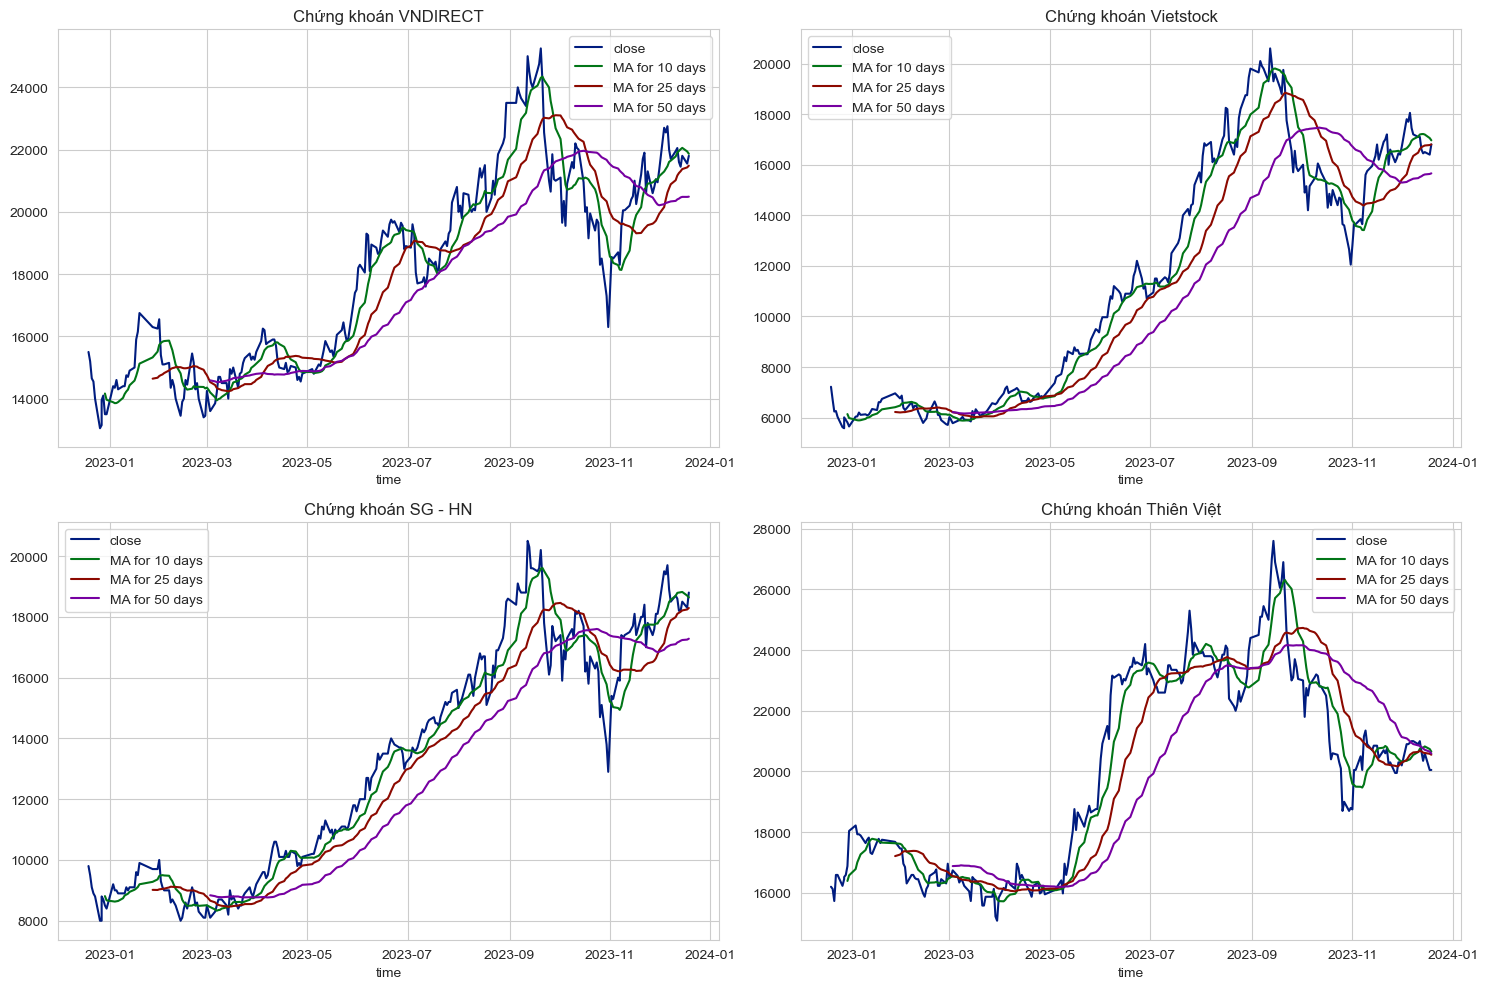

In [101]:
ma_day = [10, 25, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VND[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Chứng khoán VNDIRECT')

VIX[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Chứng khoán Vietstock')

SHS[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Chứng khoán SG - HN')

TVS[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Chứng khoán Thiên Việt')

fig.tight_layout()

## The daily return of the stock on average

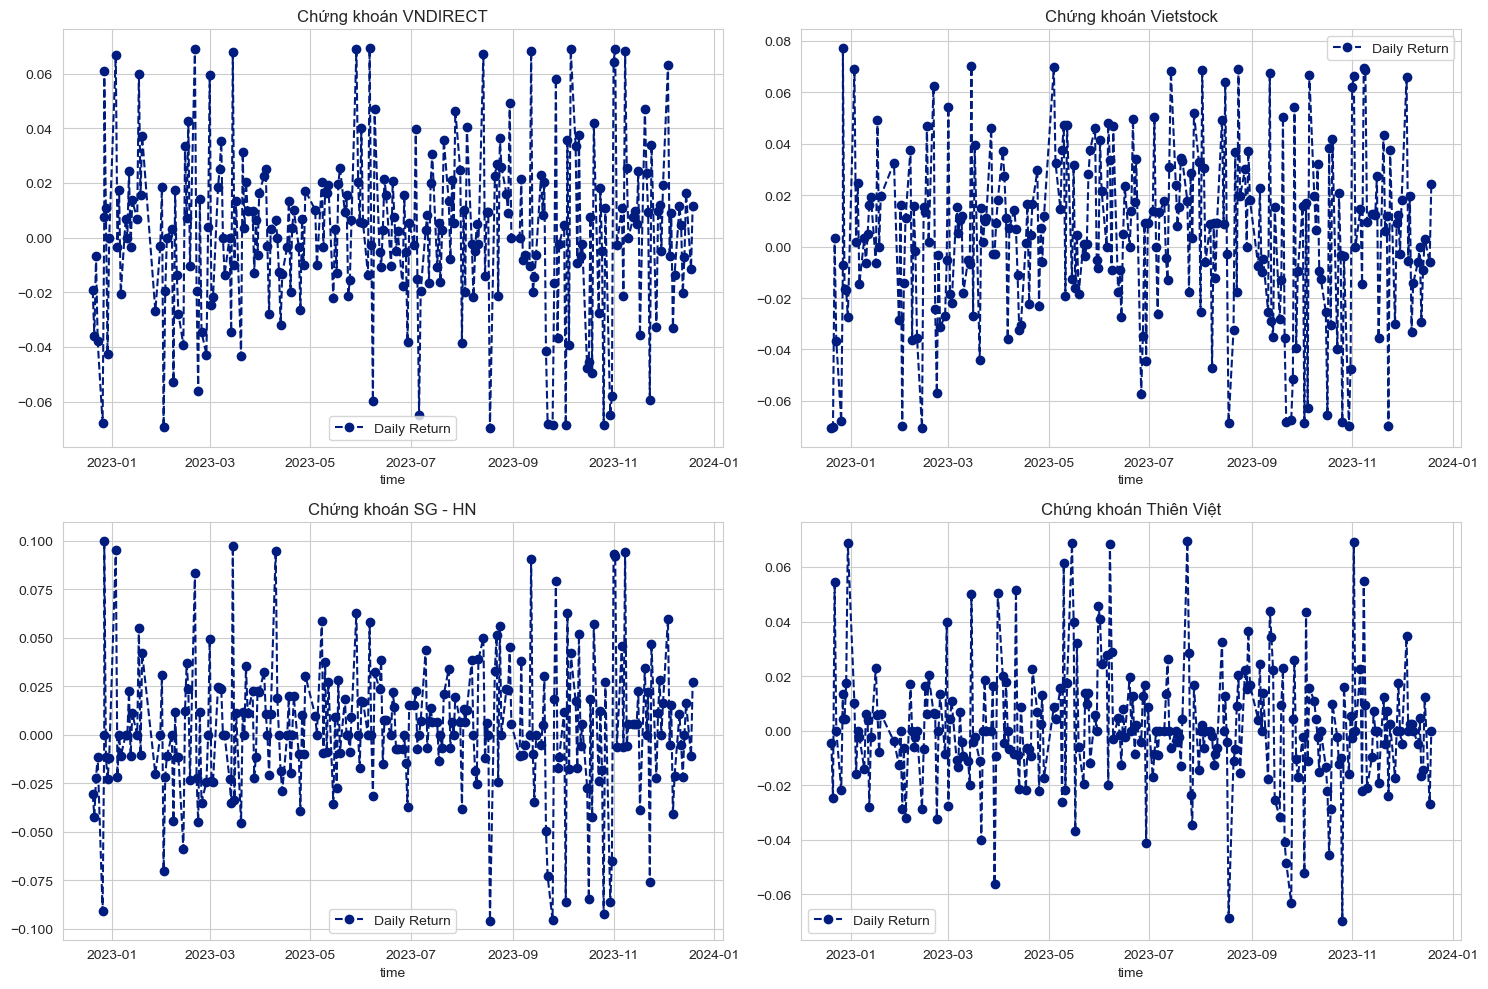

In [102]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VND['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Chứng khoán VNDIRECT')

VIX['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Chứng khoán Vietstock')

SHS['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Chứng khoán SG - HN')

TVS['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Chứng khoán Thiên Việt')

fig.tight_layout()

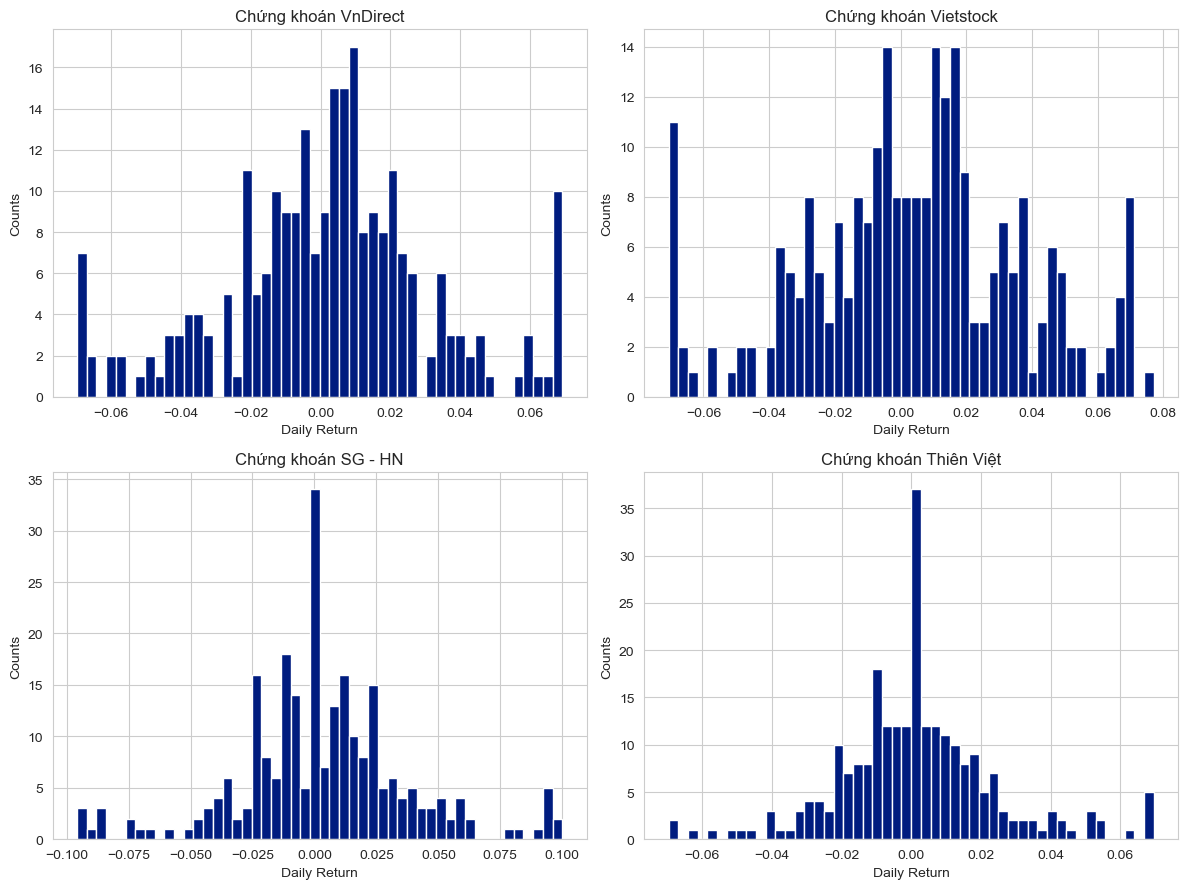

In [103]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## The correlation between different stocks closing prices

In [104]:
df

open   high    low  close    volume ticker  \
time                                                      
2022-12-19  16100  16900  15300  15500  46181200    VND   
2022-12-20  15450  15700  14600  15200  40213600    VND   
2022-12-21  15500  15550  14150  14650  37810900    VND   
2022-12-22  14900  15000  14100  14550  26054800    VND   
2022-12-23  14500  14500  13900  14000  20229500    VND   
...           ...    ...    ...    ...       ...    ...   
2023-12-13  20950  20950  20650  20650     18300    TVS   
2023-12-14  20550  20650  20350  20350     19700    TVS   
2023-12-15  20400  20650  20150  20600     38900    TVS   
2023-12-18  20500  20500  19950  20050     98300    TVS   
2023-12-19  20150  20150  19800  20050     25600    TVS   

                      company_name  
time                                
2022-12-19    Chứng khoán VnDirect  
2022-12-20    Chứng khoán VnDirect  
2022-12-21    Chứng khoán VnDirect  
2022-12-22    Chứng khoán VnDirect  
2022-12-23    Chứng khoán VnDirect  
...                            ...  
2023-12-13  Chứng khoán Thiên Việt  
2023-12-14  Chứng khoán Thiên Việt  
2023-12-15  Chứng khoán Thiên Việt  
2023-12-18  Chứng khoán Thiên Việt  
2023-12-19  Chứng khoán Thiên Việt  

[1008 rows x 7 columns]

In [105]:
df2 = df.reset_index()
df2

time   open   high    low  close    volume ticker  \
0     2022-12-19  16100  16900  15300  15500  46181200    VND   
1     2022-12-20  15450  15700  14600  15200  40213600    VND   
2     2022-12-21  15500  15550  14150  14650  37810900    VND   
3     2022-12-22  14900  15000  14100  14550  26054800    VND   
4     2022-12-23  14500  14500  13900  14000  20229500    VND   
...          ...    ...    ...    ...    ...       ...    ...   
1003  2023-12-13  20950  20950  20650  20650     18300    TVS   
1004  2023-12-14  20550  20650  20350  20350     19700    TVS   
1005  2023-12-15  20400  20650  20150  20600     38900    TVS   
1006  2023-12-18  20500  20500  19950  20050     98300    TVS   
1007  2023-12-19  20150  20150  19800  20050     25600    TVS   

                company_name  
0       Chứng khoán VnDirect  
1       Chứng khoán VnDirect  
2       Chứng khoán VnDirect  
3       Chứng khoán VnDirect  
4       Chứng khoán VnDirect  
...                      ...  
1003  Chứng khoán Thiên Việt  
1004  Chứng khoán Thiên Việt  
1005  Chứng khoán Thiên Việt  
1006  Chứng khoán Thiên Việt  
1007  Chứng khoán Thiên Việt  

[1008 rows x 8 columns]

In [129]:
# Tạo DataFrame cho từng ticker
df_VND = df2[df2['ticker'] == 'VND'][['time', 'close']].set_index('time').rename(columns={'close': 'VND'})
df_VIX = df2[df2['ticker'] == 'VIX'][['time', 'close']].set_index('time').rename(columns={'close': 'VIX'})
df_SHS = df2[df2['ticker'] == 'SHS'][['time', 'close']].set_index('time').rename(columns={'close': 'SHS'})
df_TVS = df2[df2['ticker'] == 'TVS'][['time', 'close']].set_index('time').rename(columns={'close': 'TVS'})
df_vnindex = vn.stock_historical_data("VNINDEX", start, end, "1D", "index")
df_vnindex = df_vnindex[['time', 'close']].set_index('time').rename(columns={'close': 'VNINDEX'})

df_VND = df_VND.loc[~df_VND.index.duplicated(keep='first')]
df_VIX = df_VIX.loc[~df_VIX.index.duplicated(keep='first')]
df_SHS = df_SHS.loc[~df_SHS.index.duplicated(keep='first')]
df_TVS = df_TVS.loc[~df_TVS.index.duplicated(keep='first')]

# Kết hợp các DataFrame theo cột 'time'
closing_df = pd.concat([df_VND, df_VIX, df_SHS, df_TVS, df_vnindex], axis=1)

# Hiển thị DataFrame mới
closing_df


VND    VIX    SHS    TVS    VNINDEX
time                                             
2022-12-19  15500   7220   9800  16200  1038400.0
2022-12-20  15200   6710   9500  16129  1023130.0
2022-12-21  14650   6240   9100  15730  1018880.0
2022-12-22  14550   6260   8900  16590  1022610.0
2022-12-23  14000   6030   8800  16590  1020340.0
...           ...    ...    ...    ...        ...
2023-12-13  21600  16600  18200  20650  1114200.0
2023-12-14  21450  16450  18200  20350  1110130.0
2023-12-15  21800  16500  18500  20600  1102300.0
2023-12-18  21550  16400  18300  20050  1091880.0
2023-12-19  21800  16800  18800  20050  1096300.0

[251 rows x 5 columns]

In [130]:
stock_rets = closing_df.pct_change()
stock_rets

VND       VIX       SHS       TVS   VNINDEX
time                                                        
2022-12-19       NaN       NaN       NaN       NaN       NaN
2022-12-20 -0.019355 -0.070637 -0.030612 -0.004383 -0.014705
2022-12-21 -0.036184 -0.070045 -0.042105 -0.024738 -0.004154
2022-12-22 -0.006826  0.003205 -0.021978  0.054673  0.003661
2022-12-23 -0.037801 -0.036741 -0.011236  0.000000 -0.002220
...              ...       ...       ...       ...       ...
2023-12-13 -0.020408 -0.029240 -0.021505 -0.016667 -0.011910
2023-12-14 -0.006944 -0.009036  0.000000 -0.014528 -0.003653
2023-12-15  0.016317  0.003040  0.016484  0.012285 -0.007053
2023-12-18 -0.011468 -0.006061 -0.010811 -0.026699 -0.009453
2023-12-19  0.011601  0.024390  0.027322  0.000000  0.004048

[251 rows x 5 columns]

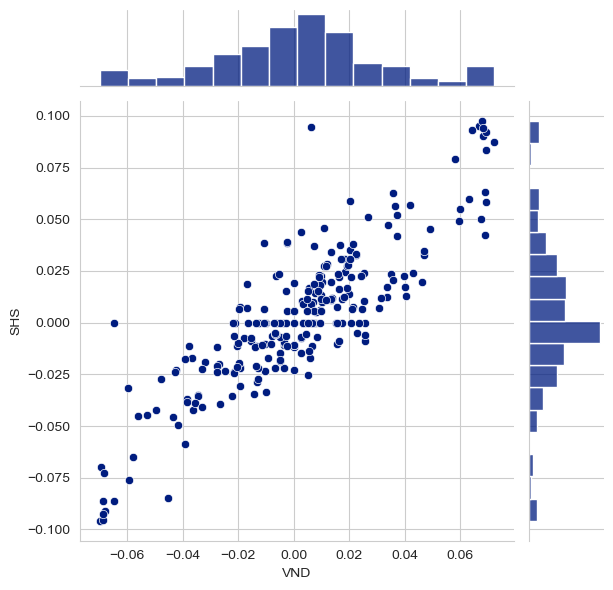

In [117]:
sns.jointplot(x='VND', y='SHS', data=stock_rets.reset_index(), kind='scatter')

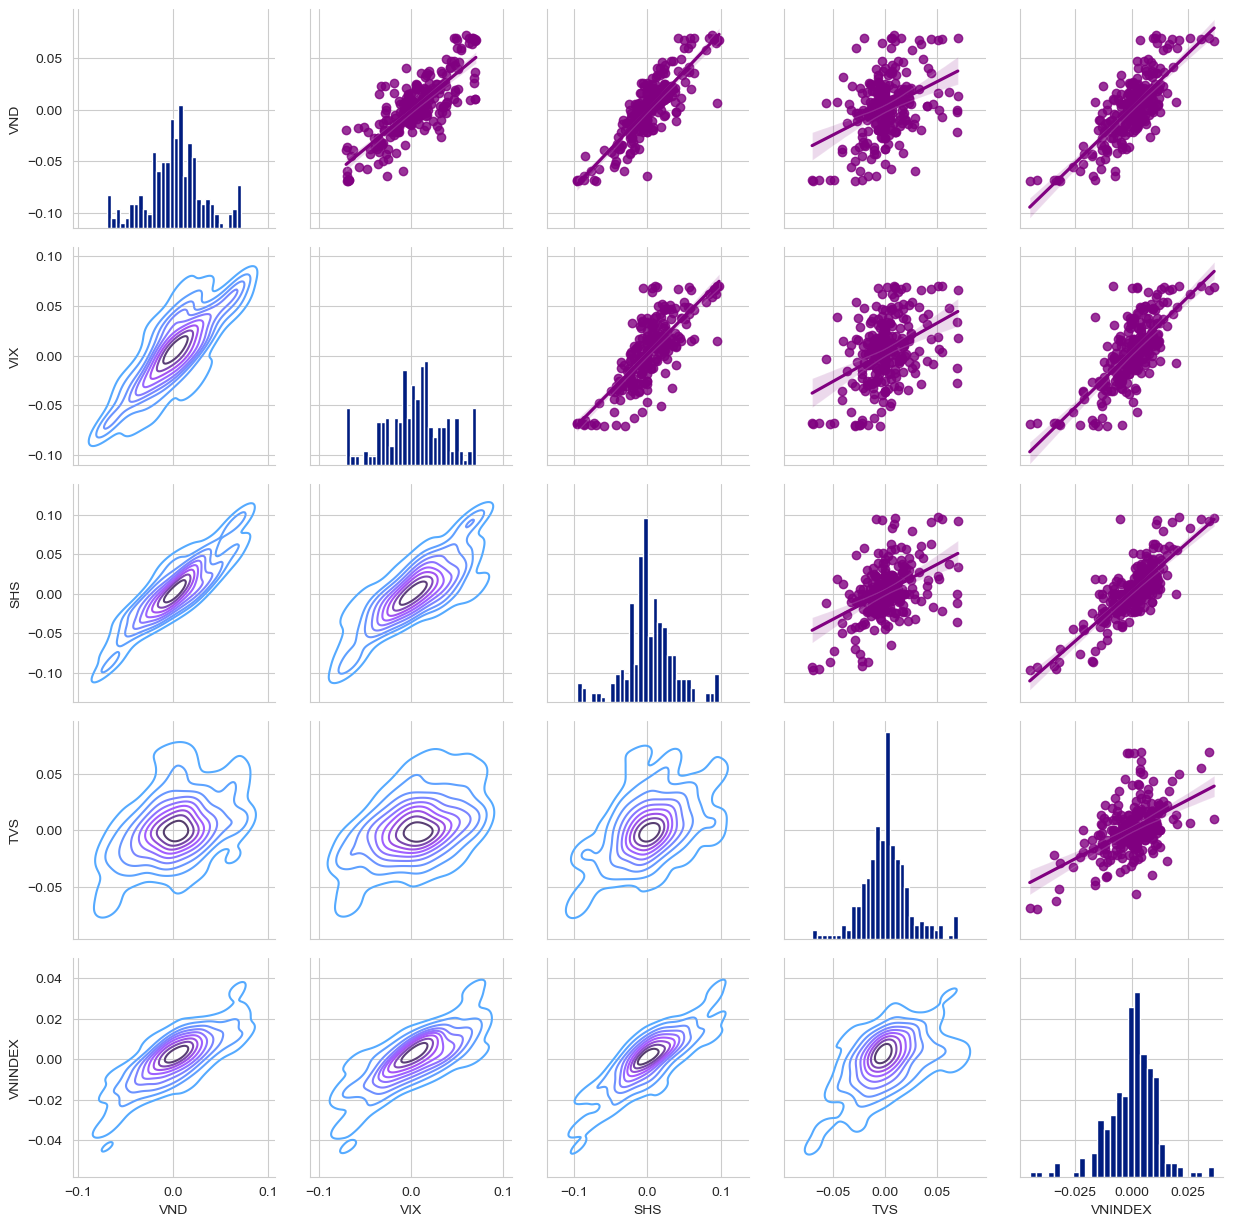

In [131]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.reset_index().dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

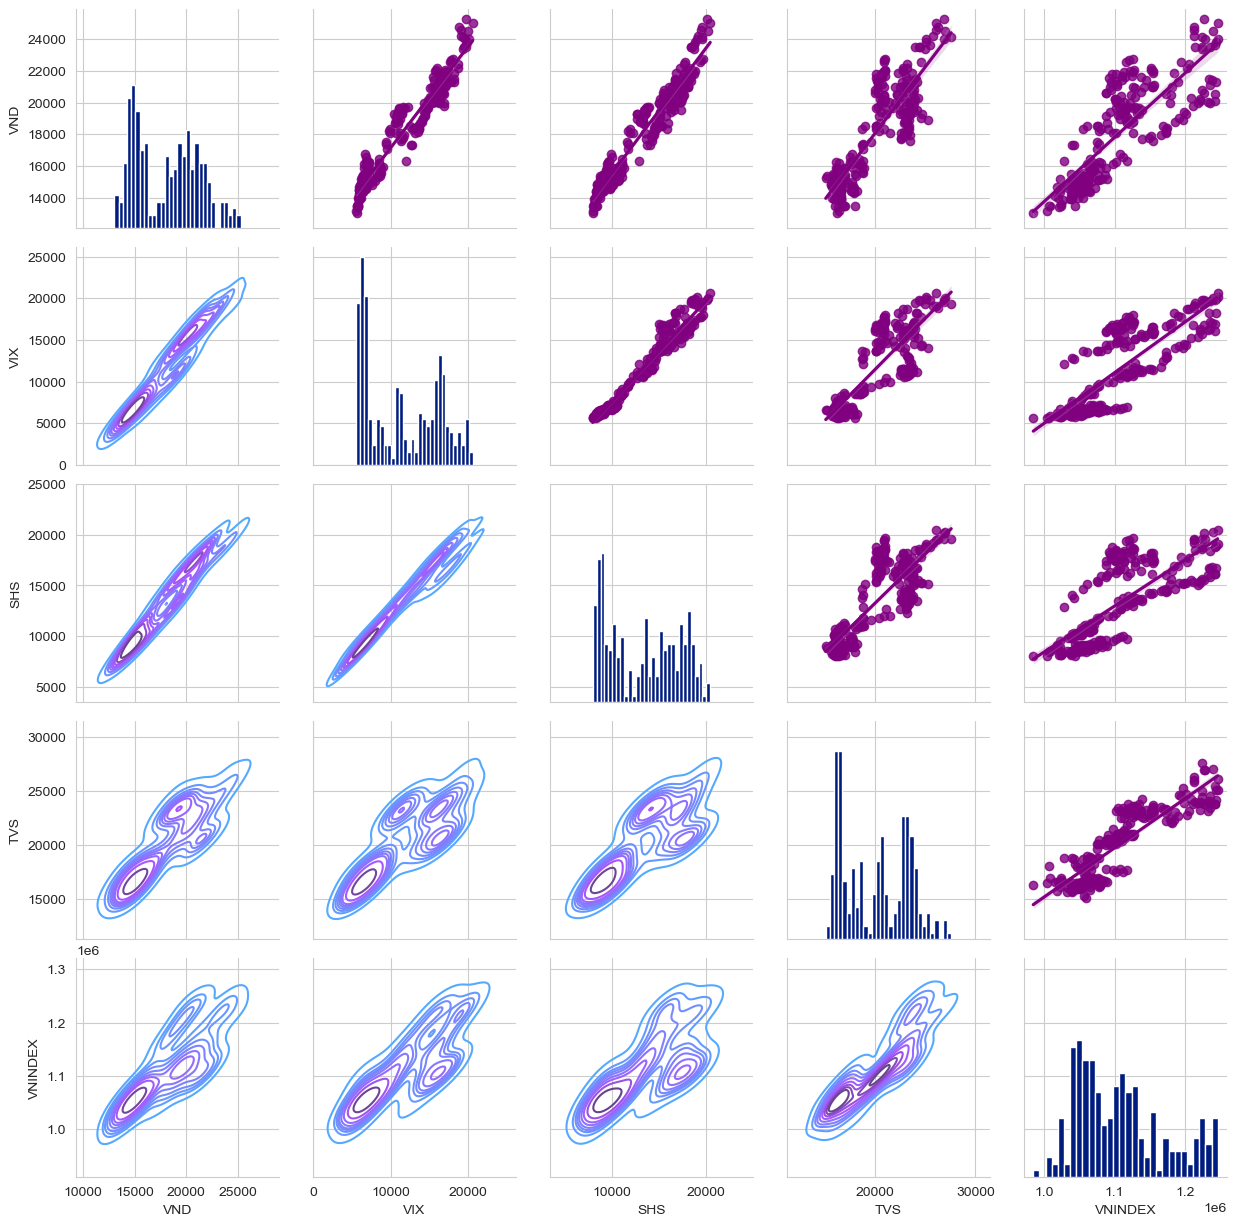

In [134]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(closing_df.reset_index())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)


Text(0.5, 1.0, 'Correlation of stock closing price')

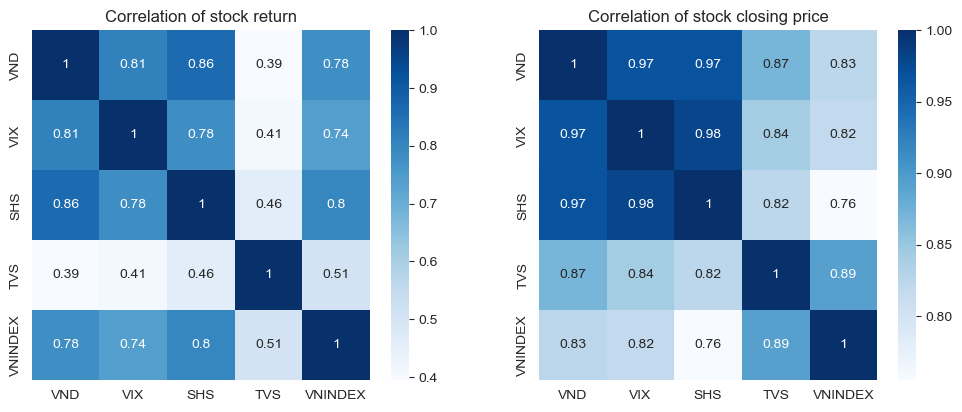

In [133]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_rets.corr(), annot=True, cmap='Blues')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation of stock closing price')

Through correlation analysis, it is shown that the prices of the four securities companies are positively correlated with each other.

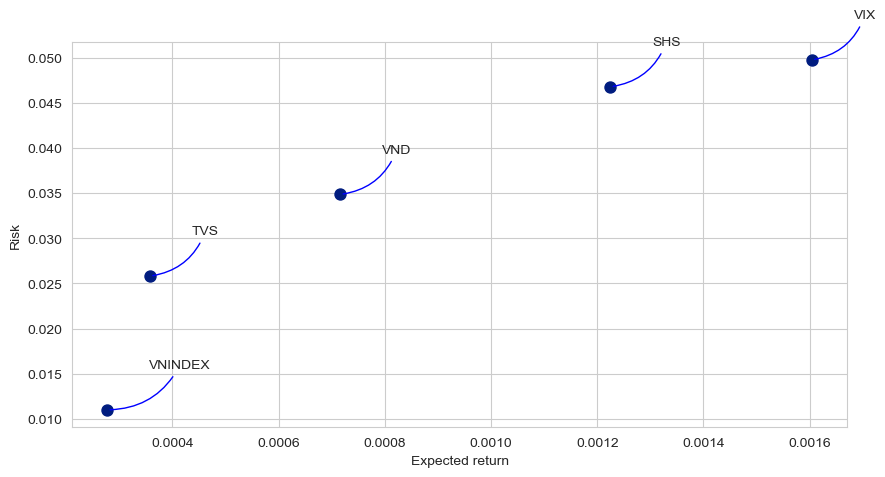

In [128]:
rets = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 5))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(30, 30), 
                 textcoords='offset points', 
                 arrowprops=dict(arrowstyle='-', 
                                 color='blue', 
                                 connectionstyle='arc3,rad=-0.3')
                )


In [135]:
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

data = vn.stock_historical_data('VIX', start, end, resolution='1D',
                                type='stock').set_index("time")
data.head()


open  high   low  close  volume ticker
time                                              
2012-12-19  1230  1230  1230   1230       0    VIX
2012-12-20  1230  1230  1230   1230       0    VIX
2012-12-21  1230  1230  1230   1230       0    VIX
2012-12-24  1170  1170  1170   1170    1100    VIX
2012-12-25  1180  1220  1170   1170    1700    VIX

In [136]:
# Adding indicators
data['EMAF']=ta.ema(data.close, length=20)
data['EMAM']=ta.ema(data.close, length=100)
data['EMAS']=ta.ema(data.close, length=150)


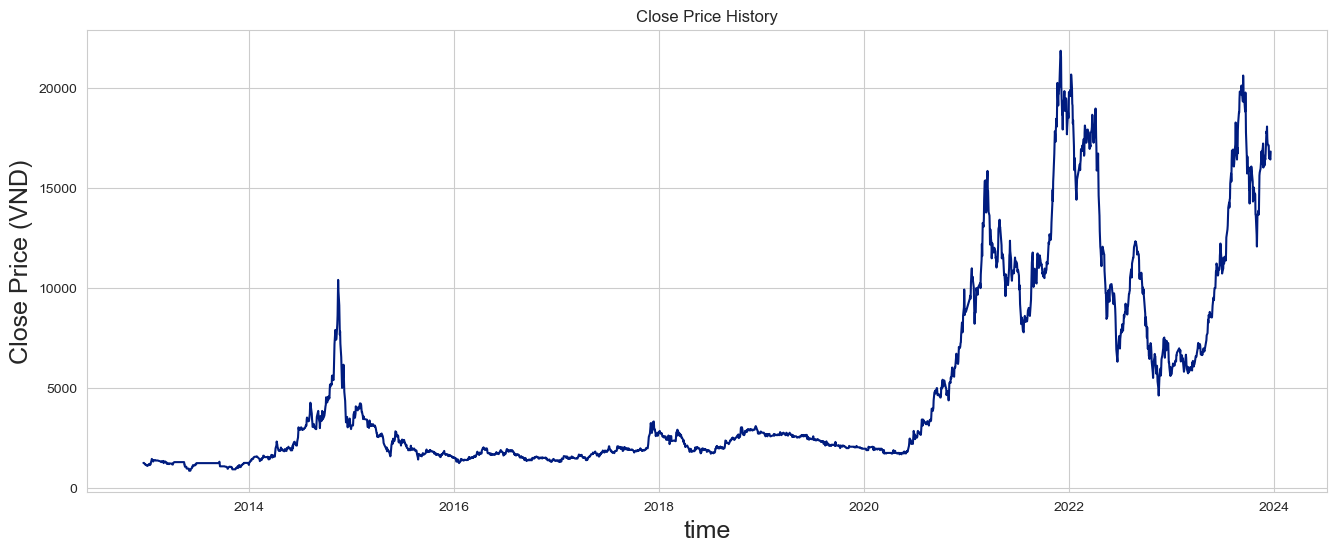

In [137]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['close'])
plt.xlabel('time', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.show()

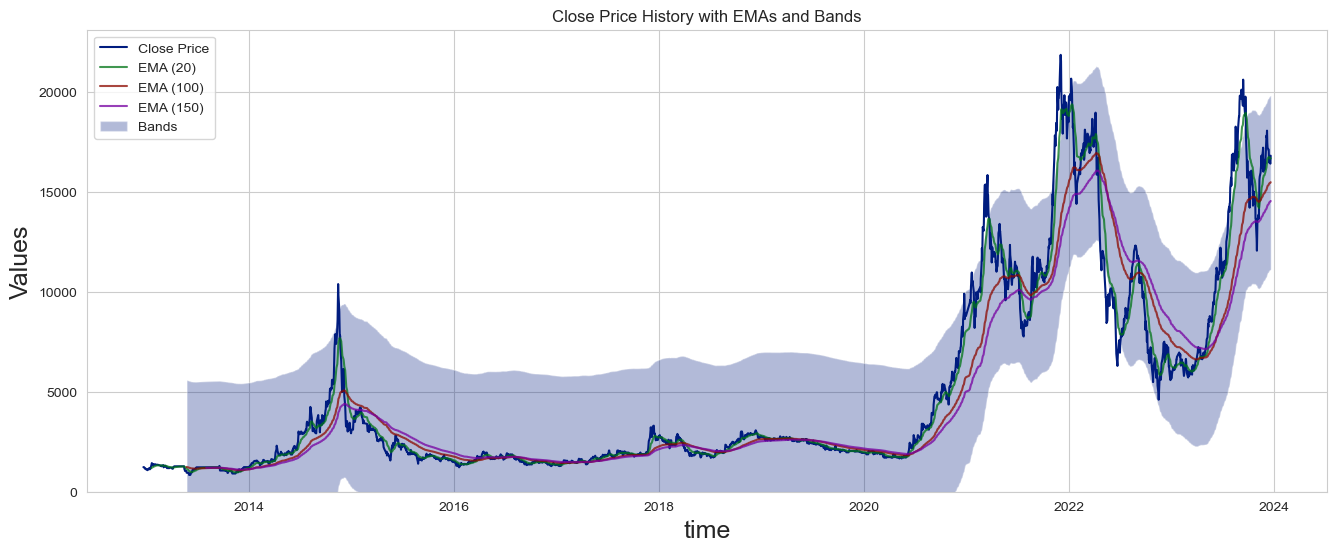

In [138]:
plt.figure(figsize=(16, 6))
plt.title('Close Price History with EMAs and Bands')
plt.plot(data['close'], label='Close Price')

# Plot EMAs with reduced opacity
plt.plot(data['EMAF'], label='EMA (20)', alpha=0.75)
plt.plot(data['EMAM'], label='EMA (100)', alpha=0.75)
plt.plot(data['EMAS'], label='EMA (150)', alpha=0.75)

# Calculate upper and lower bands with 1 standard deviation
upper_band = data['EMAM'] + data['EMAM'].std()
lower_band = data['EMAM'] - data['EMAM'].std()

# Plot upper and lower bands
plt.fill_between(data.index, upper_band, lower_band, alpha=0.3, label='Bands')

plt.xlabel('time', fontsize=18)

plt.ylabel('Values', fontsize=18)
plt.ylim(0, None)
plt.legend(loc='upper left')
plt.show()


In [139]:
# Drop duplicate indices

data = data.loc[~data.index.duplicated(keep='first')]  

# Set the frequency to daily and forward fill missing values

data = data.asfreq('D', method='ffill')

data.close

time
2012-12-19     1230
2012-12-20     1230
2012-12-21     1230
2012-12-22     1230
2012-12-23     1230
              ...  
2023-12-15    16500
2023-12-16    16500
2023-12-17    16500
2023-12-18    16400
2023-12-19    16800
Freq: D, Name: close, Length: 4018, dtype: int32

In [140]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [141]:
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-dark-palette')

<Figure size 640x480 with 0 Axes>

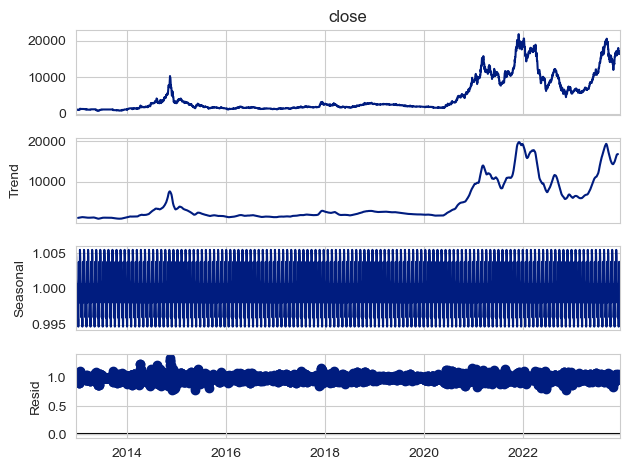

<Figure size 4000x2000 with 0 Axes>

In [143]:
# Checking decomposition of trend, seasonality and residue of the original time seires.
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['close'], 
                                   model='multiplicative', period=30)
fig = plt.figure()  
fig = decomposition.plot()
fig = plt.figure(dpi=200)
fig.set_size_inches(20, 10)

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -1.269117
p-value: 0.643180
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 5.666612
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_10996\181077043.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


<Figure size 2400x600 with 0 Axes>

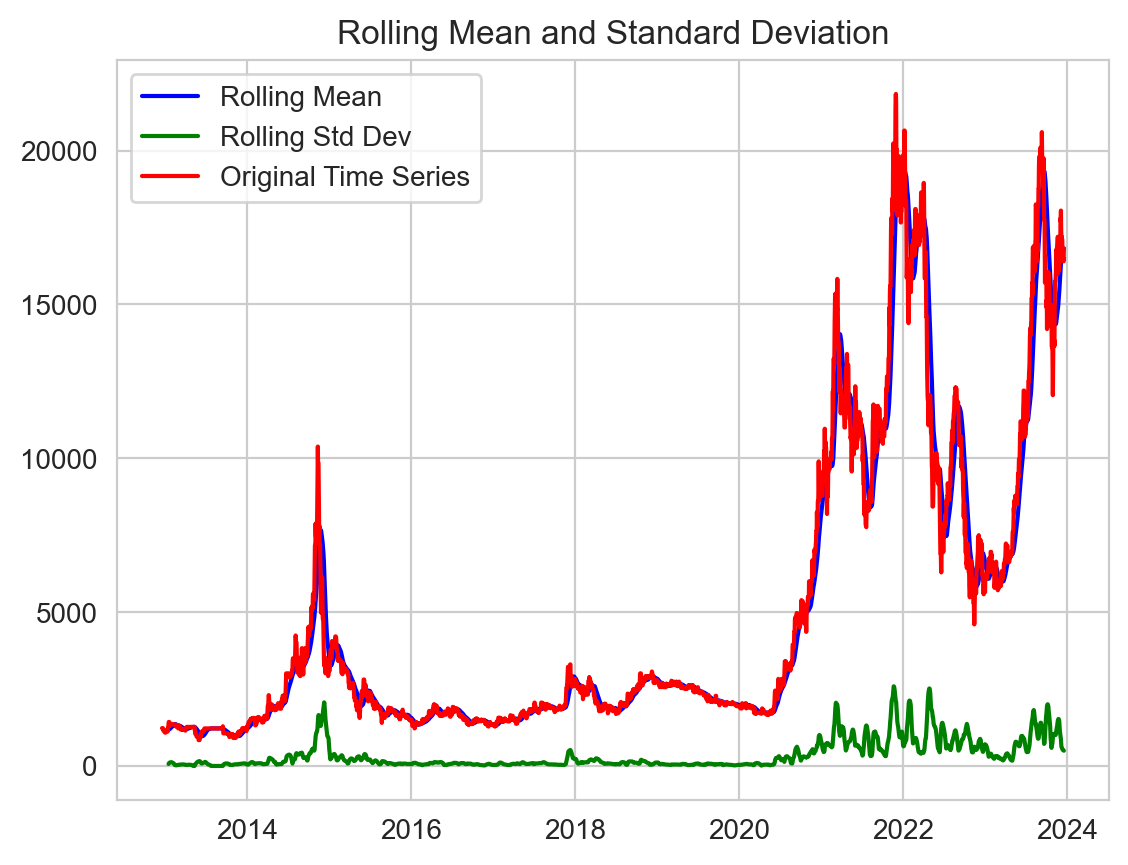

In [144]:
#Testing for stationarity using ADF and KPSS Tests.
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.figure(dpi=200)
    plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='green', label = 'Rolling Std Dev')
    plt.plot(stock_close_price, color='red',label='Original Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(data['close'])

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -1.016097
p-value: 0.747348
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 6.686142
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_10996\2354844914.py:30: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


<Figure size 2400x600 with 0 Axes>

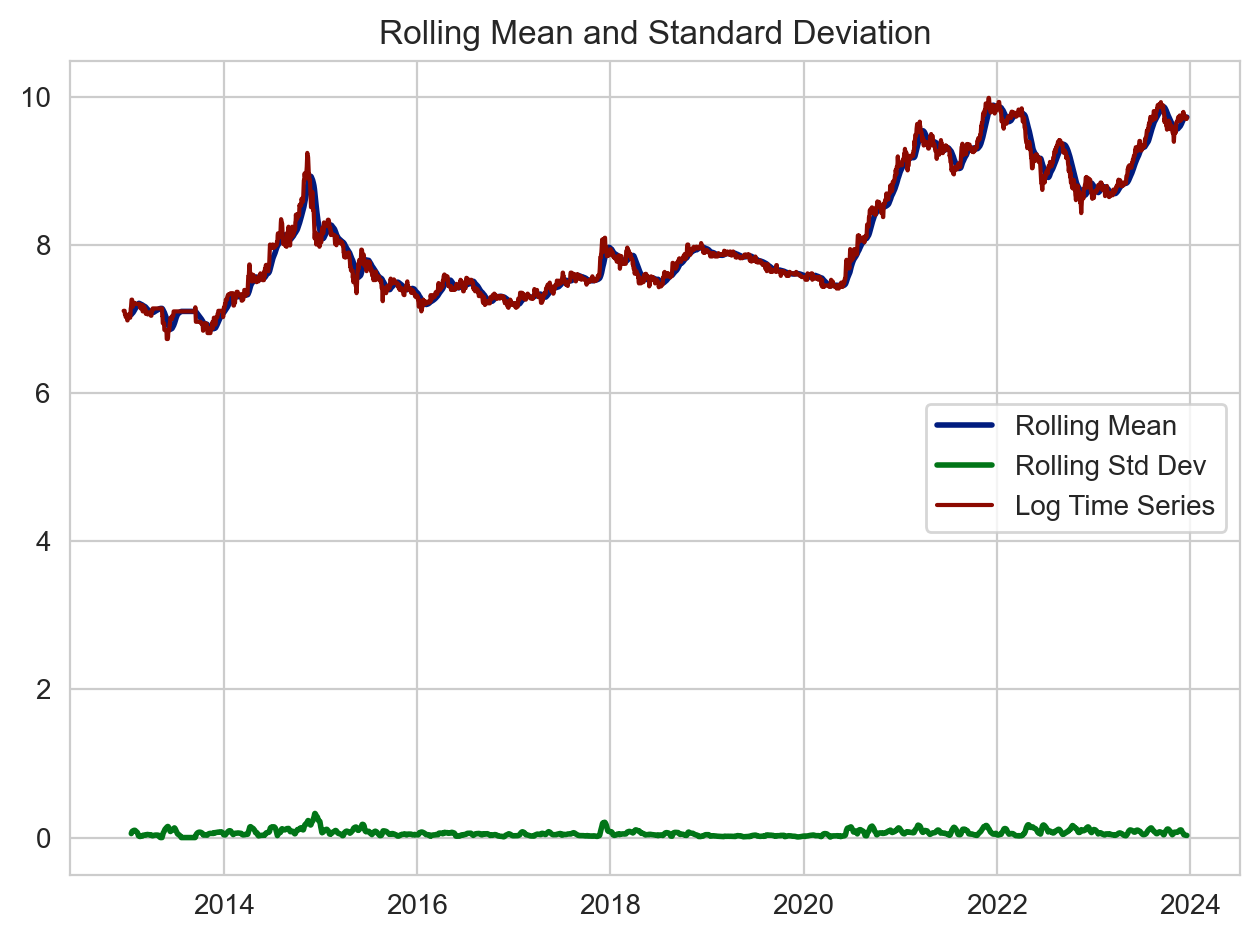

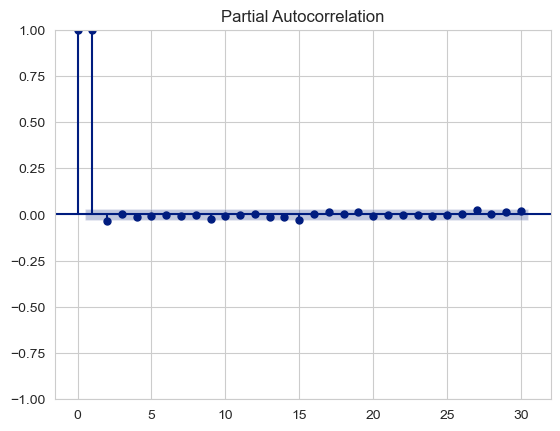

In [145]:
#Testing for stationarity of de-trended time series using ADF and KPSS Tests.

data['Close_Log'] = np.log(data['close'])

def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.figure(dpi=200)
    plt.plot(rolling_mean, label='Rolling Mean',linewidth=2.0)
    plt.plot(rolling_std_dev, label = 'Rolling Std Dev',linewidth=2.0)
    plt.plot(stock_close_price,label='Log Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.tight_layout()
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))

stationarity_test(data['Close_Log'].dropna())

# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['Close_Log'].dropna(), lags=30)

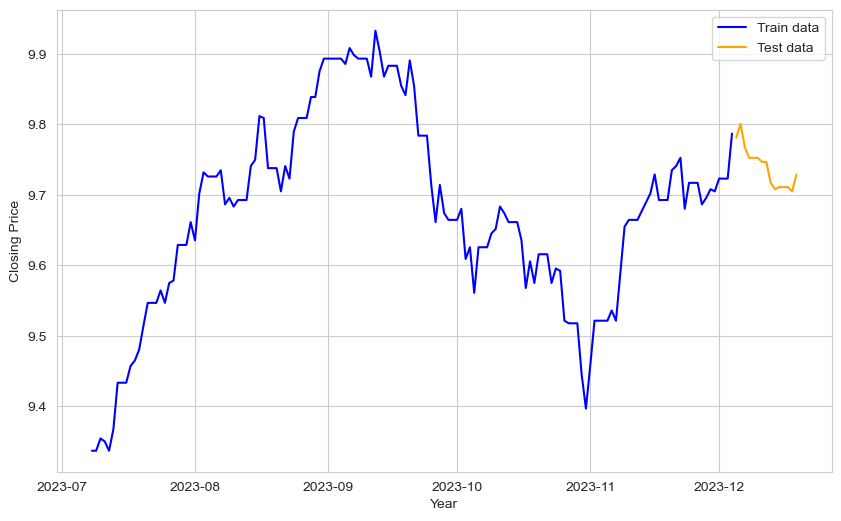

In [173]:
#split data into train and training set
Stock_data_arima = data['Close_Log']
test_size = 15
train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]


# Plotting the train and test sets.
plt.figure(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(train_data[-150:], 'blue', label='Train data')
plt.plot(test_data, 'orange', label='Test data')
plt.legend()

In [174]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16859.107, Time=0.90 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16881.674, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16882.461, Time=2.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16859.047, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16881.853, Time=1.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-16881.295, Time=1.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-16879.139, Time=1.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-16882.679, Time=0.98 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-16882.013, Time=0.79 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-16881.447, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-16881.907, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-16879.278, Time=0.76 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 11.380 seconds
                               SARIMAX Results                 

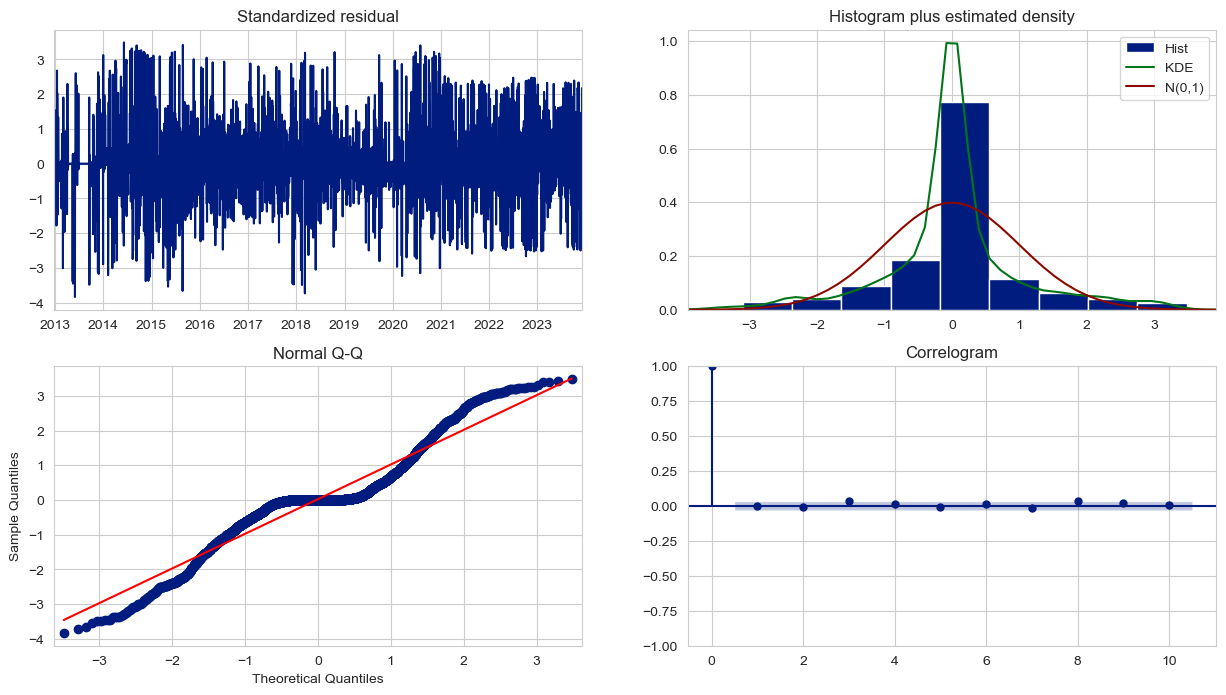

<Figure size 1280x960 with 0 Axes>

In [175]:

model = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())
model.plot_diagnostics(figsize=(15,8))
plt.figure(dpi=200)
plt.show()

In [176]:
prediction, confint = model.predict(n_periods= test_size, alpha=0.05, return_conf_int=True)


In [177]:
cf= pd.DataFrame(confint)

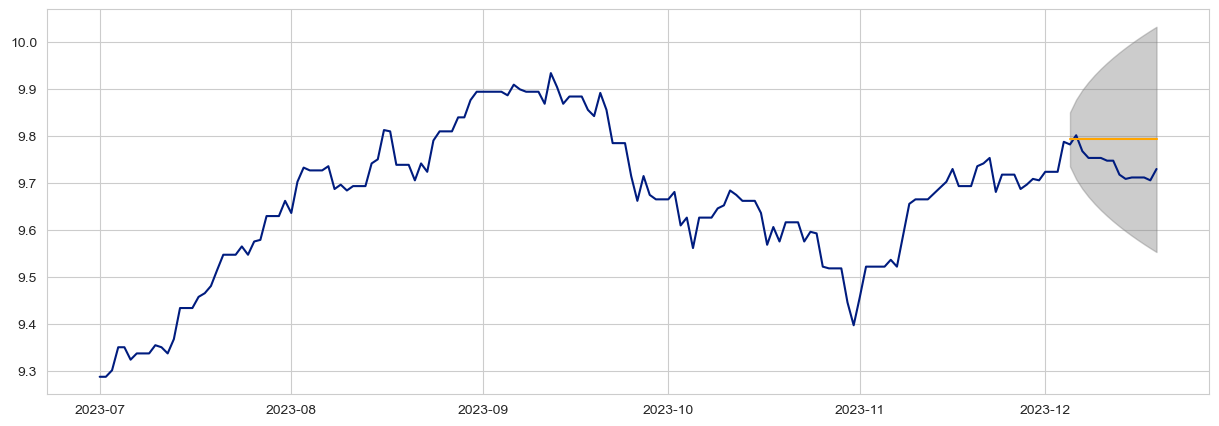

In [178]:
prediction_series = pd.Series(prediction,index=test_data.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima.last('6M'))
ax.plot(prediction_series, color = 'orange')
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.4)

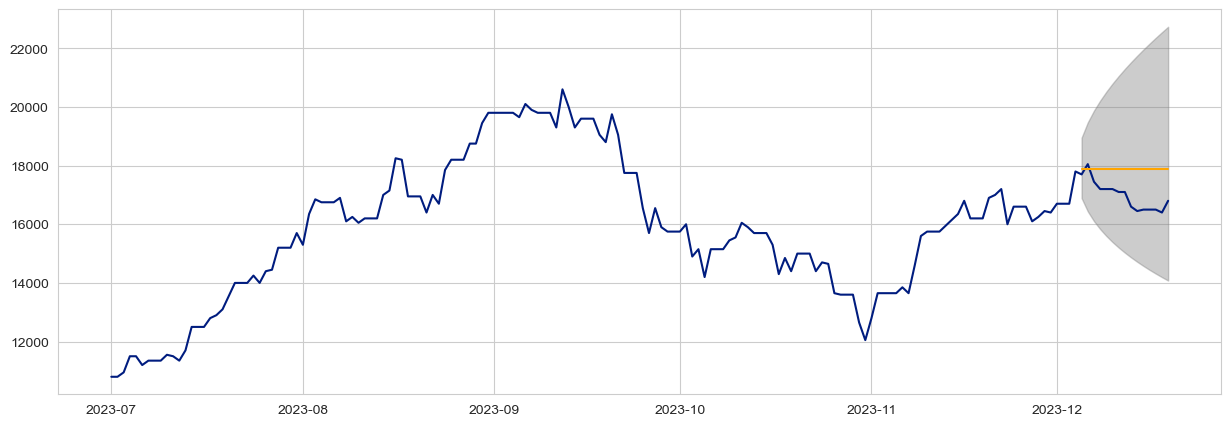

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data['close'].last('6M'))
ax.plot(np.exp(prediction_series), color = 'orange')
ax.fill_between(prediction_series.index,
                np.exp(cf[0]), 
                np.exp(cf[1]),
                color='grey',alpha=.4)

In [156]:
def calcsmape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

In [157]:
smape=calcsmape(test_data,prediction)
smape

0.005500754614788932

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16933.317, Time=1.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16955.813, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16956.573, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16933.347, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16955.871, Time=2.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-16955.354, Time=1.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-16953.187, Time=2.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-16956.871, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-16956.115, Time=0.79 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-16955.591, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-16956.126, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-16953.411, Time=0.69 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 11.681 seconds
                               SARIMAX Results                 

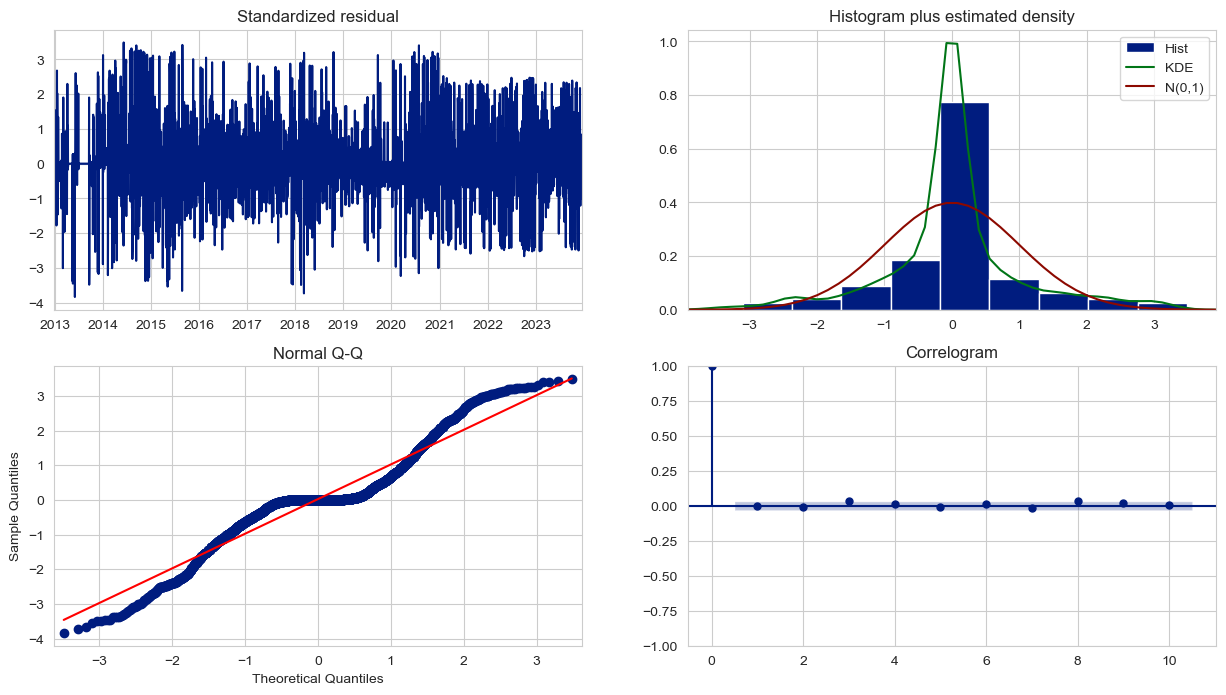

In [158]:
model = auto_arima(Stock_data_arima, start_p=0, start_q=0,
                   test='adf',
                   max_p=3, max_q=3,
                   m=1,
                   d=None,
                   seasonal=False,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

print(model.summary())
model.plot_diagnostics(figsize=(15, 8))
plt.show()

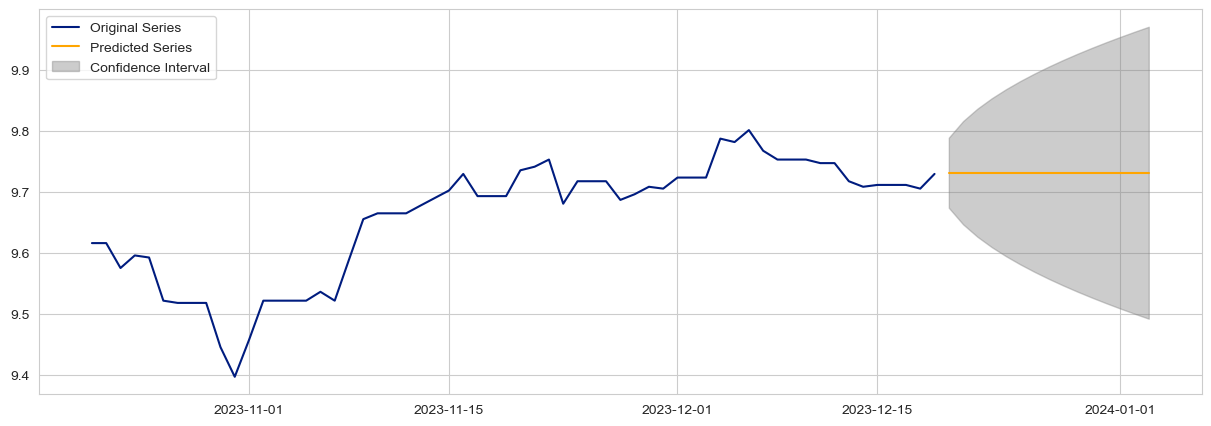

In [159]:
# Predict the next 180 days
forecast, confint = model.predict(n_periods=15, 
                                  alpha=0.05, 
                                  return_conf_int=True)

# Create a DataFrame for confidence intervals
cf = pd.DataFrame(confint, columns=['lower', 'upper'])

# Create a time index for the next 180 days
next_15_days_index = pd.date_range(start=Stock_data_arima.index[-1] 
                                    + pd.DateOffset(1), 
                                    periods=15)

# Create a Series for the prediction with the new time index
prediction_series = pd.Series(forecast, index=next_15_days_index)

# Plot the original series and the predicted series with confidence intervals
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima[-60:], label='Original Series')
ax.plot(prediction_series, label='Predicted Series', color = 'orange')
ax.fill_between(prediction_series.index, 
                cf['lower'], cf['upper'], 
                color='grey', alpha=0.4, 
                label='Confidence Interval')
ax.legend(loc = 'upper left')
plt.show()


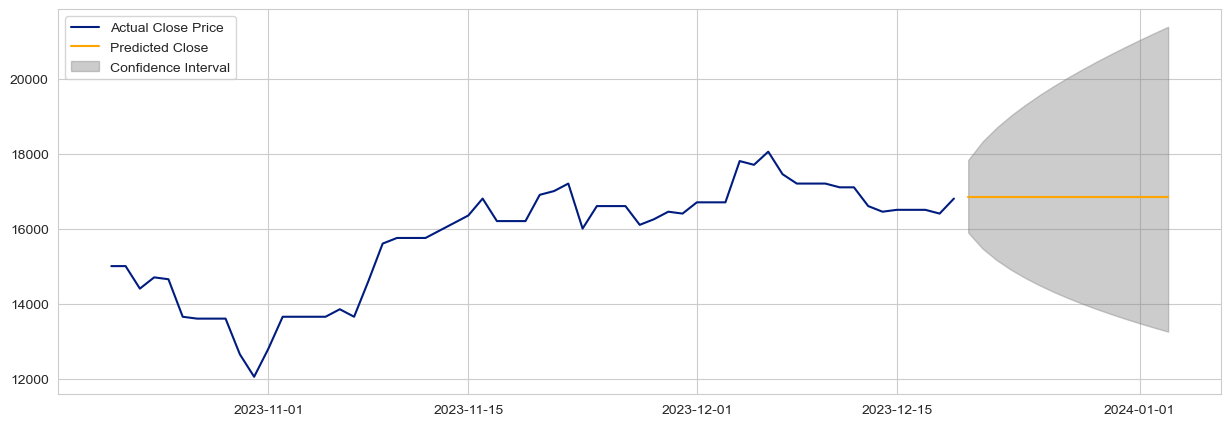

In [160]:
# Plot the Actual Close Price and the Predicted Close Price with confidence intervals
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data.close[-60:], label='Actual Close Price')
ax.plot(next_15_days_index, 
        np.exp(prediction_series),  color = 'orange',
        label='Predicted Close')
ax.fill_between(next_15_days_index, 
                np.exp(cf['lower']), np.exp(cf['upper']), 
                color='grey', alpha=0.4, 
                label='Confidence Interval')
ax.legend(loc = 'upper left')
plt.show()

In [161]:
returns =  100* data.close.pct_change().dropna()

Text(0.5, 1.0, 'VIX Returns')

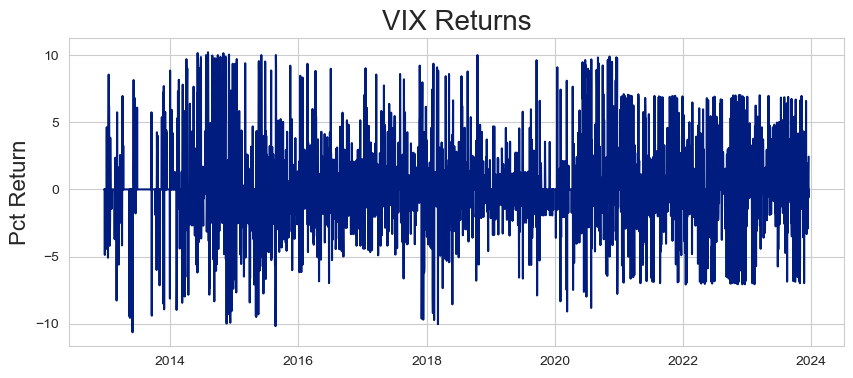

In [162]:

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('VIX Returns', fontsize=20)

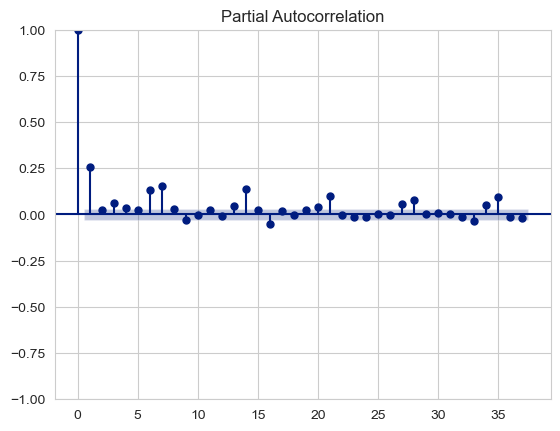

In [163]:
plot_pacf(returns**2)
plt.show()

In [164]:
from arch import arch_model
model = arch_model(returns, p=1, q=1)

In [ ]:
from arch import arch_model
model = arch_model(returns, p=1, q=1)

In [ ]:

model_fit = model.fit()

In [166]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9791.09
Distribution:                  Normal   AIC:                           19590.2
Method:            Maximum Likelihood   BIC:                           19615.4
                                        No. Observations:                 4017
Date:                Wed, Dec 20 2023   Df Residuals:                     4016
Time:                        00:38:06   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0910  4.179e-02      2.178  2.940e-02 [9.113e-03,  0.173]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2376      0.221      1.073      0.283   [ -0.196,  0.672]
alpha[1]       0.0620  2.752e-02      2.254  2.421e-02 [8.089e-03,  0.116]
beta[1]        0.9107  5.232e-02     17.406  7.429e-68   [  0.808,  1.013]
==========================================================================

Covariance estimator: robust
"""

In [167]:
rolling_predictions = []
test_size = 365*2

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [168]:
rolling_predictions = pd.Series(rolling_predictions, 
                                index=returns.index[-365*2:])

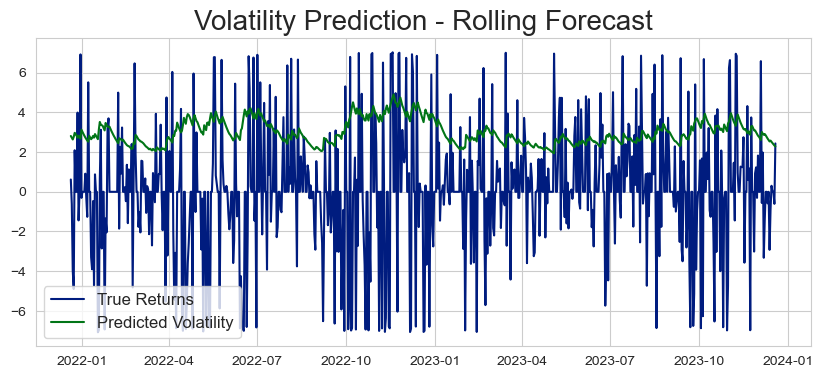

In [169]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*2:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'],
           loc = 'lower left', fontsize=12)

In [170]:
from datetime import timedelta

pred = model_fit.forecast(horizon=15)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,16)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 15 Days')

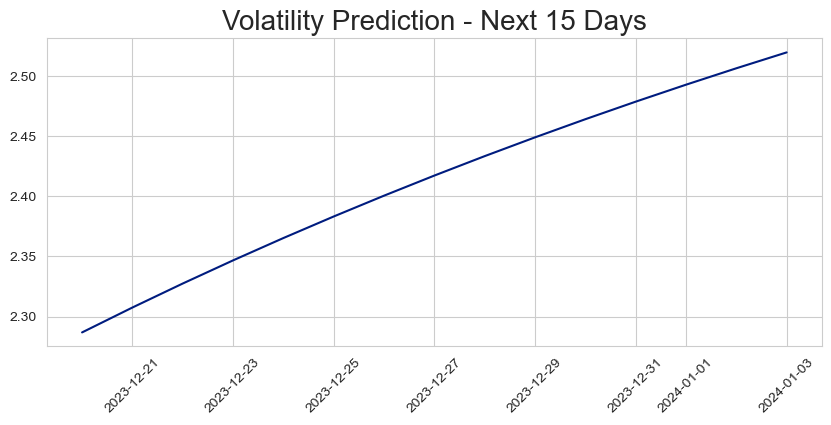

In [171]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.xticks(rotation = 45)
plt.title('Volatility Prediction - Next 15 Days', fontsize=20)